# The Beautiful Game

## Introduction

In this notebook we will be taking a deeper look in to the Ultimate 25k+ Matches Football Database -European dataset. Which contains information about player stats, match stats, teams, betting odds, and many more from the year 2008 to 2016. The dataset could be found [here](https://www.kaggle.com/datasets/prajitdatta/ultimate-25k-matches-football-database-european).

## What is to be achieved in this project?

In this project we imagine that there is a data scientist working in a sports betting company. The business executives in the company identified betting on soccer as an potential new business opportunity. The problem is that the company doesn't know a lot about soccer. So we will try to explore the dataset given to find valuable insights for the company and increase thier awareness in European Football.

## Imports and Data Preprocessing

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sms
from scipy import stats

In [2]:
import sqlite3
conn = sqlite3.connect('database.sqlite')

In [3]:
country_leagues = pd.read_sql("""SELECT Country.name AS country_name, League.name AS league_name, * FROM Country
                    JOIN League ON Country.id = League.country_id;""", conn)
country_leagues = country_leagues.drop(['name'], axis=1)
country_leagues

,country_name,league_name,id,country_id
0,Belgium,Belgium Jupiler League,1,1
1,England,England Premier League,1729,1729
2,France,France Ligue 1,4769,4769
3,Germany,Germany 1. Bundesliga,7809,7809
4,Italy,Italy Serie A,10257,10257
5,Netherlands,Netherlands Eredivisie,13274,13274
6,Poland,Poland Ekstraklasa,15722,15722
7,Portugal,Portugal Liga ZON Sagres,17642,17642
8,Scotland,Scotland Premier League,19694,19694
9,Spain,Spain LIGA BBVA,21518,21518


In [4]:
# merge Player_Attributes and Player tables using id
player_merge = pd.read_sql("""SELECT * FROM Player_Attributes
                    JOIN Player ON Player_Attributes.player_api_id = Player.player_api_id;""", conn)
player_merge.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,birthday,height,weight
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
1,1,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
2,1,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,69.0,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
3,1,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
4,1,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,66.0,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187


In [5]:
# convert the date column to datetime
player_merge['date'] = pd.to_datetime(player_merge['date'])

In [6]:
player_merge.describe()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,...,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,height,weight
count,183978.000000,183978.000000,183978.000000,183978,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,...,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183978.000000,183978.000000
mean,5520.197785,165636.285936,135900.617324,2012-12-07 05:49:56.771353088,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,...,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439,181.878872,168.776245
min,1.000000,2.000000,2625.000000,2007-02-22 00:00:00,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,157.480000,117.000000
25%,2754.000000,155681.000000,34763.000000,2011-02-22 00:00:00,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,...,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000,177.800000,159.000000
50%,5532.000000,183471.000000,77741.000000,2013-09-20 00:00:00,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,...,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000,182.880000,168.000000
75%,8256.000000,199843.750000,191080.000000,2014-12-19 00:00:00,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,...,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000,185.420000,179.000000
max,11075.000000,234141.000000,750584.000000,2016-07-07 00:00:00,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,...,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000,208.280000,243.000000
std,3191.425870,53856.899802,136927.840510,NaN,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,...,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155,6.394818,15.088920


In [7]:
player_merge.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [8]:
player_merge.duplicated().sum()

1

In [9]:
team_merge = pd.read_sql("""SELECT * FROM Team
                    JOIN Team_Attributes ON Team.team_api_id = Team_Attributes.team_api_id;""", conn)
team_merge.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,9930,434,FC Aarau,AAR,2010-02-22 00:00:00,60,Balanced,NaN,Little,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,9930,434,FC Aarau,AAR,2014-09-19 00:00:00,52,Balanced,48.0,Normal,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,9930,434,FC Aarau,AAR,2015-09-10 00:00:00,47,Balanced,41.0,Normal,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,8485,77,Aberdeen,ABE,2010-02-22 00:00:00,70,Fast,NaN,Little,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,8485,77,Aberdeen,ABE,2011-02-22 00:00:00,47,Balanced,NaN,Little,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [10]:
team_merge.describe()

,id,team_api_id,team_fifa_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,9995.727023,17706.982167,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,13264.869900,39179.857739,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1601.000000,1.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,8457.750000,110.000000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,8674.000000,485.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,9904.000000,1900.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,274581.000000,112513.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


In [11]:
team_merge.isnull().sum()

id                                  0
team_api_id                         0
team_fifa_api_id                    0
team_long_name                      0
team_short_name                     0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefen

In [12]:
team_merge.duplicated().sum()

0

In [13]:
match_df = pd.read_sql_query("SELECT * FROM Match", conn)
match_df.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [14]:
# convert the date column to datetime
match_df['date'] = pd.to_datetime(match_df['date'])

In [15]:
cols = []
for col in match_df.columns:
    cols.append(col)

betting_related = cols[85:]

betting_df = pd.DataFrame(match_df, columns=betting_related)
betting_df = pd.concat([match_df.iloc[:, :9], betting_df], axis=1)

betting_df.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,B365H,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1.73,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,9994,1.95,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,8635,2.38,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17,492476,9991,9998,1.44,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16,492477,7947,9985,5.00,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [16]:
betting_df.describe()

,id,country_id,league_id,stage,date,match_api_id,home_team_api_id,away_team_api_id,B365H,B365D,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979.000000,25979.000000,25979.000000,25979.000000,25979,2.597900e+04,25979.000000,25979.000000,22592.000000,22592.000000,...,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,2012-06-30 17:53:53.334616320,1.195429e+06,9984.371993,9984.475115,2.628818,3.839684,...,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
min,1.000000,1.000000,1.000000,1.000000,2008-07-18 00:00:00,4.831290e+05,1601.000000,1601.000000,1.040000,1.400000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000
25%,6495.500000,4769.000000,4769.000000,9.000000,2010-05-09 00:00:00,7.684365e+05,8475.000000,8475.000000,1.670000,3.300000,...,2.500000,1.700000,3.300000,2.550000,1.670000,3.200000,2.500000,1.670000,3.250000,2.500000
50%,12990.000000,10257.000000,10257.000000,18.000000,2012-05-13 00:00:00,1.147511e+06,8697.000000,8697.000000,2.100000,3.500000,...,3.500000,2.150000,3.500000,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000
75%,19484.500000,17642.000000,17642.000000,27.000000,2014-08-17 00:00:00,1.709852e+06,9925.000000,9925.000000,2.800000,4.000000,...,5.250000,2.800000,4.000000,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2016-05-25 00:00:00,2.216672e+06,274581.000000,274581.000000,26.000000,17.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.000000,34.000000,17.000000,13.000000,34.000000
std,7499.635658,7553.936759,7553.936759,10.407354,NaN,4.946279e+05,14087.453758,14087.445135,1.794463,1.118269,...,3.632164,1.928753,1.248221,4.318338,1.489299,0.867440,3.010189,1.507793,0.868272,3.189814


In [17]:
betting_df.isnull().sum()

id                      0
country_id              0
league_id               0
season                  0
stage                   0
date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
B365H                3387
B365D                3387
B365A                3387
BWH                  3404
BWD                  3404
BWA                  3404
IWH                  3459
IWD                  3459
IWA                  3459
LBH                  3423
LBD                  3423
LBA                  3423
PSH                 14811
PSD                 14811
PSA                 14811
WHH                  3408
WHD                  3408
WHA                  3408
SJH                  8882
SJD                  8882
SJA                  8882
VCH                  3411
VCD                  3411
VCA                  3411
GBH                 11817
GBD                 11817
GBA                 11817
BSH                 11818
BSD                 11818
BSA         

In [18]:
betting_df.duplicated().sum()

0

In [19]:
match_stats = cols[:11] + cols[77:85]
match_stats_df = pd.DataFrame(match_df, columns=match_stats)
match_stats_df

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,goal,shoton,shotoff,foulcommit,card,cross,corner,possession
0,1,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,None,None,None,None,None,None,None,None
1,2,1,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,None,None,None,None,None,None,None,None
2,3,1,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,None,None,None,None,None,None,None,None
3,4,1,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,None,None,None,None,None,None,None,None
4,5,1,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22,1992091,10190,10191,1,0,None,None,None,None,None,None,None,None
25975,25976,24558,24558,2015/2016,9,2015-09-23,1992092,9824,10199,1,2,None,None,None,None,None,None,None,None
25976,25977,24558,24558,2015/2016,9,2015-09-23,1992093,9956,10179,2,0,None,None,None,None,None,None,None,None
25977,25978,24558,24558,2015/2016,9,2015-09-22,1992094,7896,10243,0,0,None,None,None,None,None,None,None,None


In [20]:
match_stats_df.describe()

,id,country_id,league_id,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
count,25979.000000,25979.000000,25979.000000,25979.000000,25979,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,2012-06-30 17:53:53.334616320,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938
min,1.000000,1.000000,1.000000,1.000000,2008-07-18 00:00:00,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000
25%,6495.500000,4769.000000,4769.000000,9.000000,2010-05-09 00:00:00,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000
50%,12990.000000,10257.000000,10257.000000,18.000000,2012-05-13 00:00:00,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000
75%,19484.500000,17642.000000,17642.000000,27.000000,2014-08-17 00:00:00,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2016-05-25 00:00:00,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000
std,7499.635658,7553.936759,7553.936759,10.407354,NaN,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110


In [21]:
match_stats_df.isnull().sum()

id                      0
country_id              0
league_id               0
season                  0
stage                   0
date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_team_goal          0
away_team_goal          0
goal                11762
shoton              11762
shotoff             11762
foulcommit          11762
card                11762
cross               11762
corner              11762
possession          11762
dtype: int64

In [22]:
match_stats_df.duplicated().sum()

0

## EDA

**[Googgle Data Studio Visualizations](https://lookerstudio.google.com/reporting/420d7dd0-eef0-4eb4-ac81-88d5b2e74700)**

### Player Related

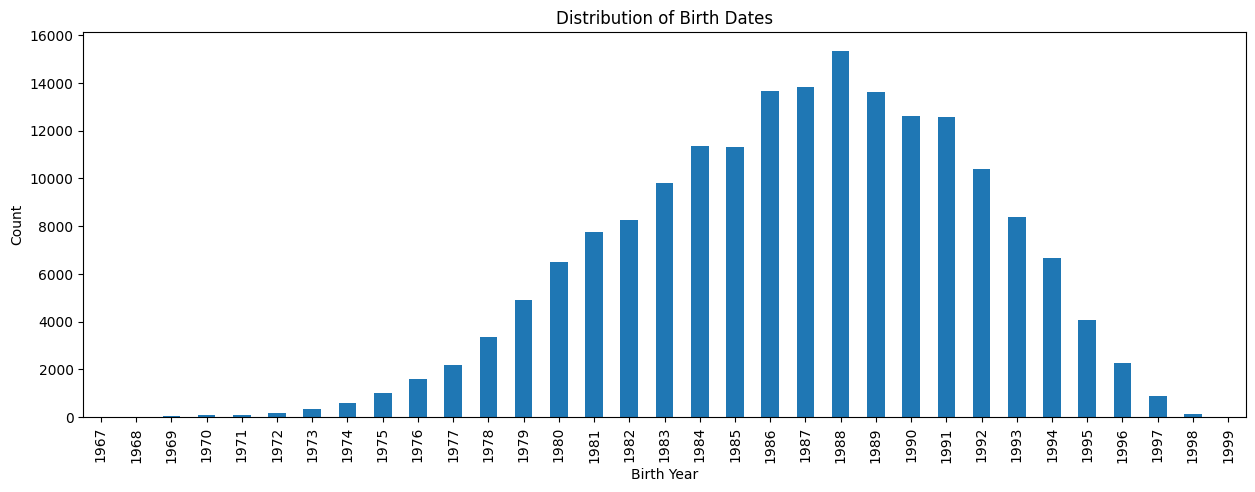

In [23]:
player_merge['birthday'] = pd.to_datetime(player_merge['birthday'])
player_merge['birthday'].dt.year.value_counts().sort_index().plot(kind='bar', figsize=(15, 5))
plt.title('Distribution of Birth Dates')
plt.xlabel('Birth Year')
plt.ylabel('Count')
plt.show()

Most players in this dataset are born in 1988.

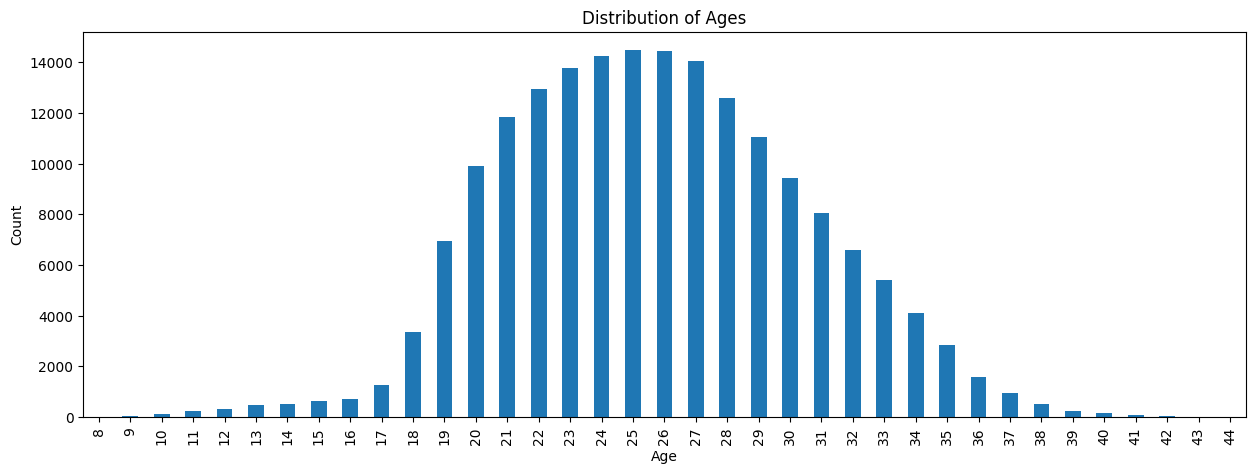

In [24]:
# ditribution of ages
player_merge['age'] = player_merge['date'].dt.year - player_merge['birthday'].dt.year
player_merge['age'].value_counts().sort_index().plot(kind='bar', figsize=(15, 5))
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Majority of the players are in thier 20s.

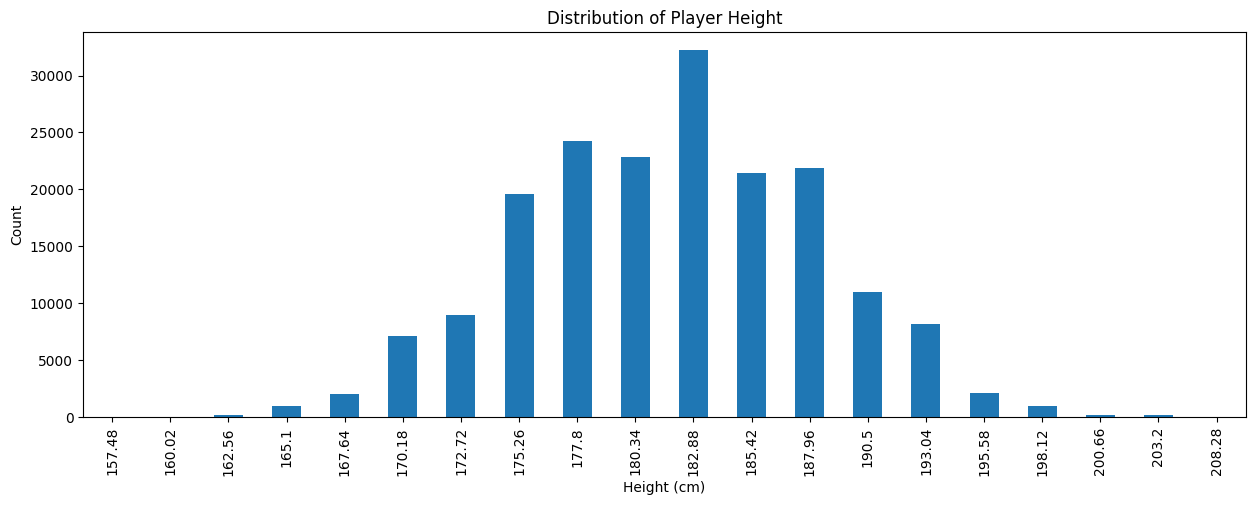

In [25]:
player_merge['height'].value_counts().sort_index().plot(kind='bar', figsize=(15, 5))
plt.title('Distribution of Player Height')
plt.xlabel('Height (cm)')
plt.ylabel('Count')
plt.show()

The most occuring height is 180.34(cm), which might indicate most players in this dataset are taller.

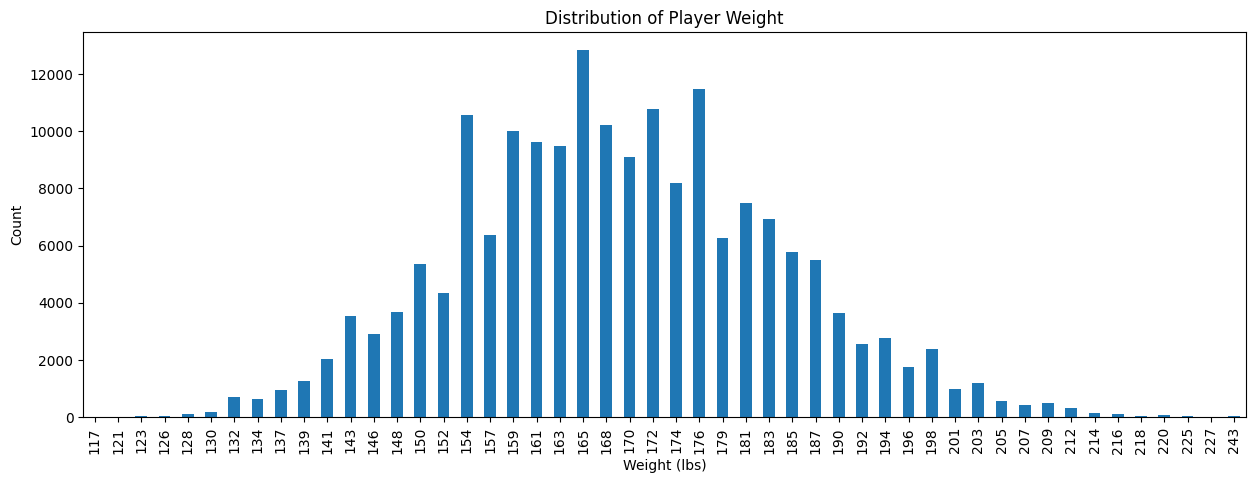

In [26]:
player_merge['weight'].value_counts().sort_index().plot(kind='bar', figsize=(15, 5))
plt.title('Distribution of Player Weight')
plt.xlabel('Weight (lbs)')
plt.ylabel('Count')
plt.show()

Players around 165 lbs and also around 176 lbs occur the msot. More players are heavier. 

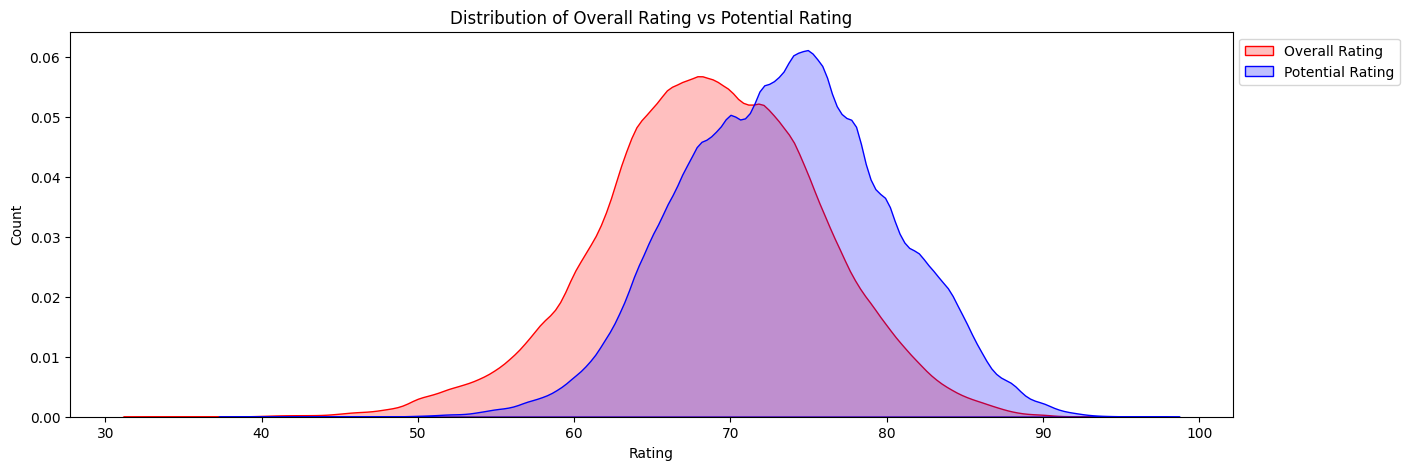

In [27]:
plt.figure(figsize=(15, 5))
sns.kdeplot(player_merge['overall_rating'], fill=True, color='r', label='Overall Rating')
sns.kdeplot(player_merge['potential'], fill=True, color='b', label='Potential Rating')
plt.title('Distribution of Overall Rating vs Potential Rating')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

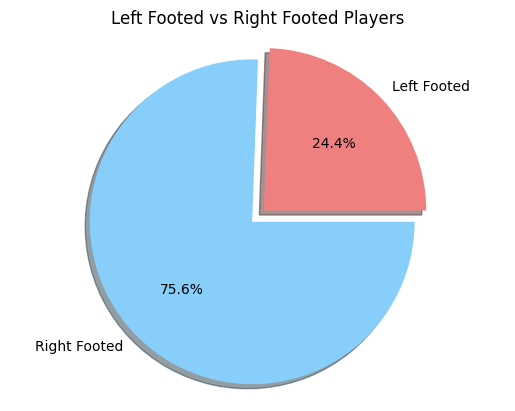

In [28]:
left_footed = player_merge[player_merge['preferred_foot'] == 'left'].shape[0]
right_footed = player_merge[player_merge['preferred_foot'] == 'right'].shape[0]
labels = ['Left Footed', 'Right Footed']
sizes = [left_footed, right_footed]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('Left Footed vs Right Footed Players')
plt.axis('equal')
plt.show()

Significantly many number of the players in this dataset are right footed.

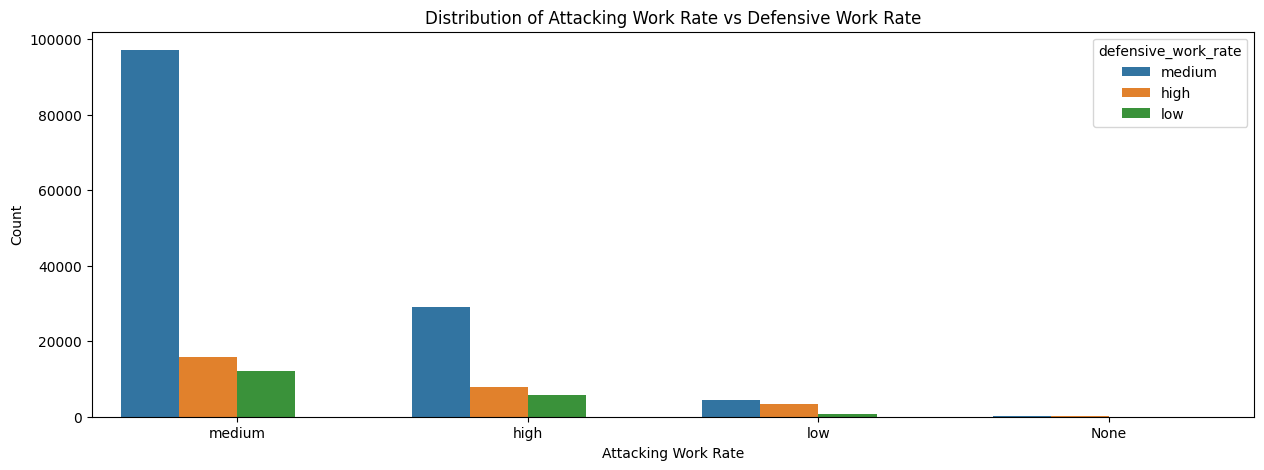

In [29]:
new_df = player_merge[~player_merge['attacking_work_rate'].isin(['None', 'le', 'norm', 'stoc', 'y'])]
new_df = player_merge[~player_merge['defensive_work_rate'].isin(['None','ean','0', '1', '2', '3', '4', '5', '6', '7', '8', '9','o', 'ormal', 'tocky', 'es'])]


plt.figure(figsize=(15, 5))
sns.countplot(x='attacking_work_rate', hue='defensive_work_rate', data=new_df)
plt.title('Distribution of Attacking Work Rate vs Defensive Work Rate')
plt.xlabel('Attacking Work Rate')
plt.ylabel('Count')
plt.show()

Most players have medium attacking and defensive work rate.

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
def plot_top_players_generic(dataframe, columns, num_players=10, x_label='Player Name', y_label='Average Score', plot_title='Top 10 Players'):
    '''
    Plots the top 10 players based on the average score of the columns provided.

    INPUT:
    dataframe - the dataframe you want to plot from
    columns - the columns you want to average
    num_players - the number of players you want to see
    x_label - the label for the x-axis
    y_label - the label for the y-axis
    plot_title - the title of the plot

    OUTPUT:
    None - just shows the plot
    '''
    columns = ['player_name'] + columns
    df = dataframe[columns]
    df['avg_score'] = df.iloc[:, 2:].mean(axis=1)
    df = df.groupby('player_name').mean()
    df = df.sort_values(by='avg_score', ascending=False)
    df = df.iloc[:num_players, :]

    df['avg_score'].plot(kind='bar', figsize=(15, 5))
    plt.title('{} with the Best {}'.format(plot_title, y_label))
    for i, v in enumerate(df['avg_score']):
        plt.text(i - 0.25, v + 0.01, str(round(v, 2)))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=45)
    plt.show()

In [32]:
def plot_player_skill_trend(dataframe, player_name, skill_columns):
    '''
    Plots the skill trend of a player over time.

    INPUT:
    dataframe - the dataframe you want to plot from
    player_name - the name of the player you want to plot
    skill_columns - the columns you want to plot

    OUTPUT:
    None - just shows the plot
    '''
    player_data = dataframe[dataframe['player_name'] == player_name]
    columns_to_select = ['player_name', 'date', 'overall_rating'] + skill_columns
    player_data = player_data[columns_to_select]
    player_data['avg_skill'] = player_data[skill_columns].mean(axis=1)
    player_data = player_data.sort_values(by='date')
    player_data = player_data.set_index('date')
    player_data = player_data[['overall_rating', 'avg_skill']]

    player_data.plot(figsize=(15, 5))
    plt.title("{}'s Skill Trend".format(player_name))
    plt.xlabel('Date')
    plt.ylabel('Score')
    plt.show()

#### Passing Specs

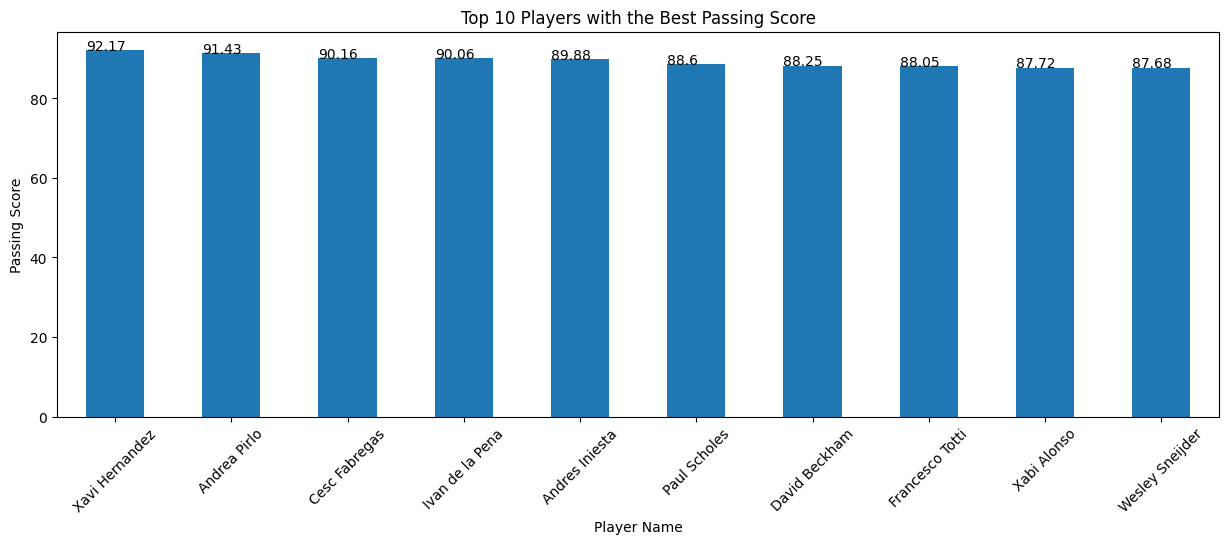

In [33]:
plot_top_players_generic(player_merge, ['overall_rating', 'crossing', 'short_passing', 'long_passing', 'vision'], y_label='Passing Score')

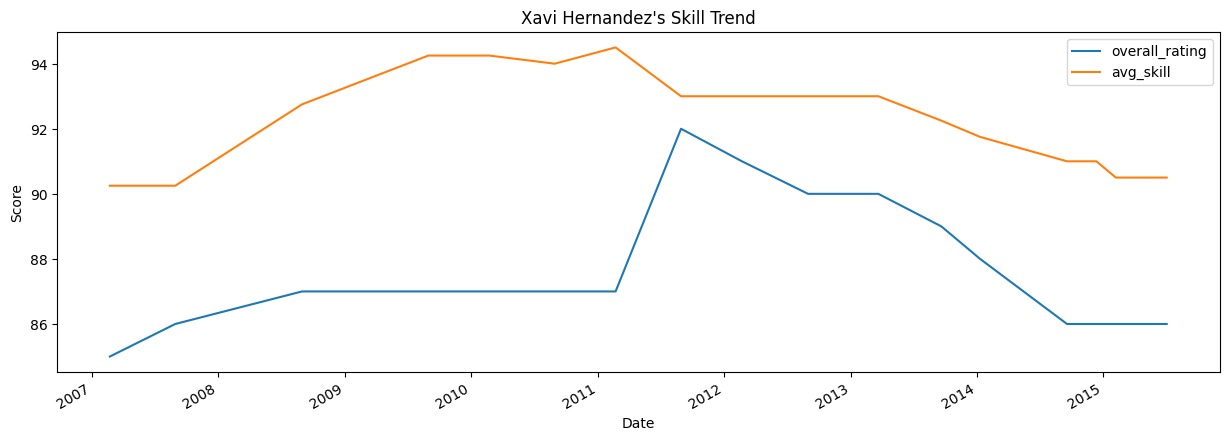

In [34]:
plot_player_skill_trend(player_merge, 'Xavi Hernandez', ['crossing', 'short_passing', 'long_passing', 'vision'])

#### Shooting Specs

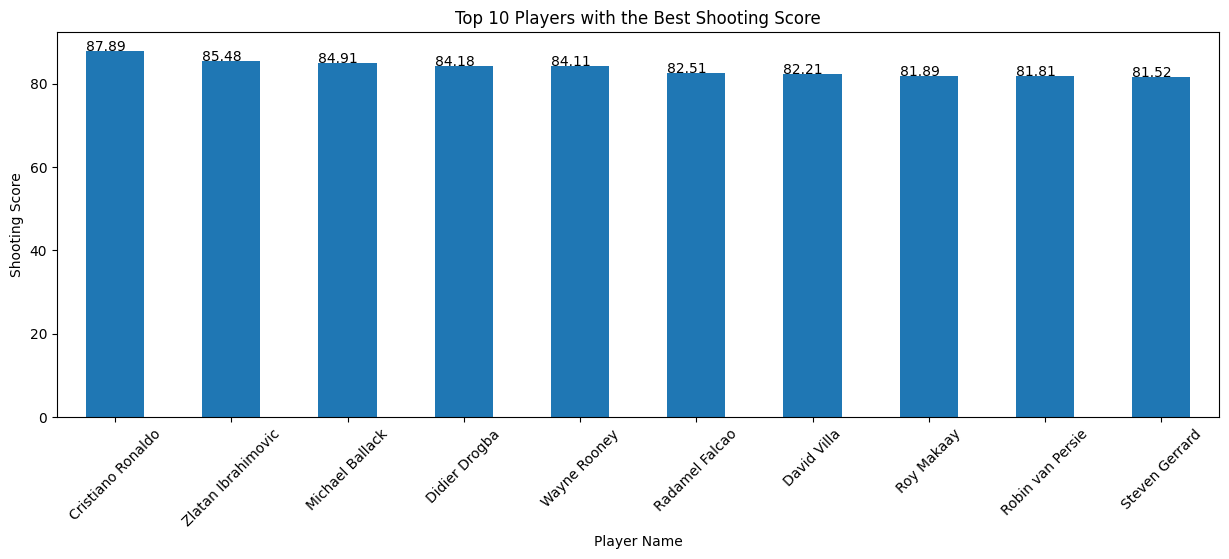

In [35]:
plot_top_players_generic(player_merge, ['overall_rating', 'finishing', 'heading_accuracy', 'volleys', 'free_kick_accuracy', 'shot_power', 'jumping', 'long_shots', 'penalties'], y_label='Shooting Score')

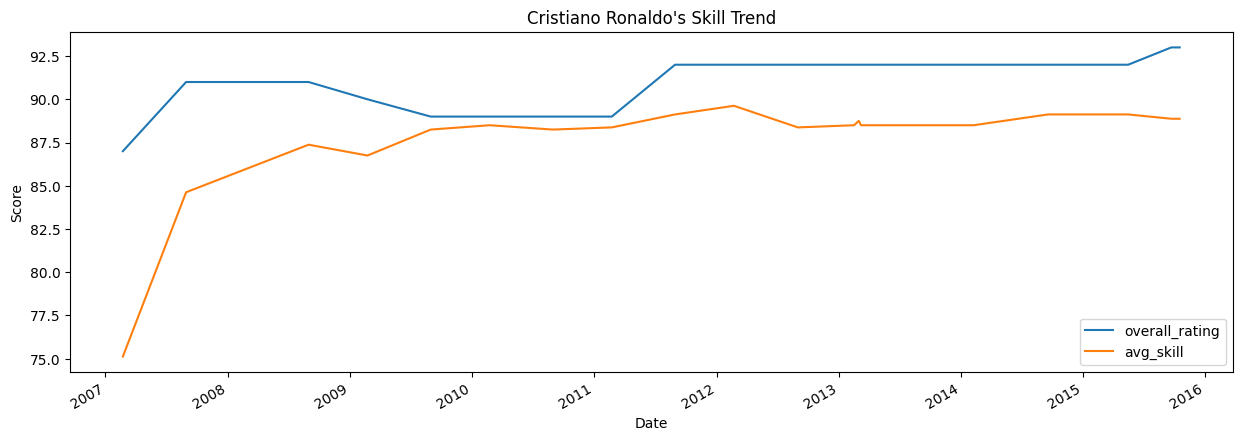

In [36]:
plot_player_skill_trend(player_merge, 'Cristiano Ronaldo', ['finishing', 'heading_accuracy', 'volleys', 'free_kick_accuracy', 'shot_power', 'jumping', 'long_shots', 'penalties'])

#### Physique Specs

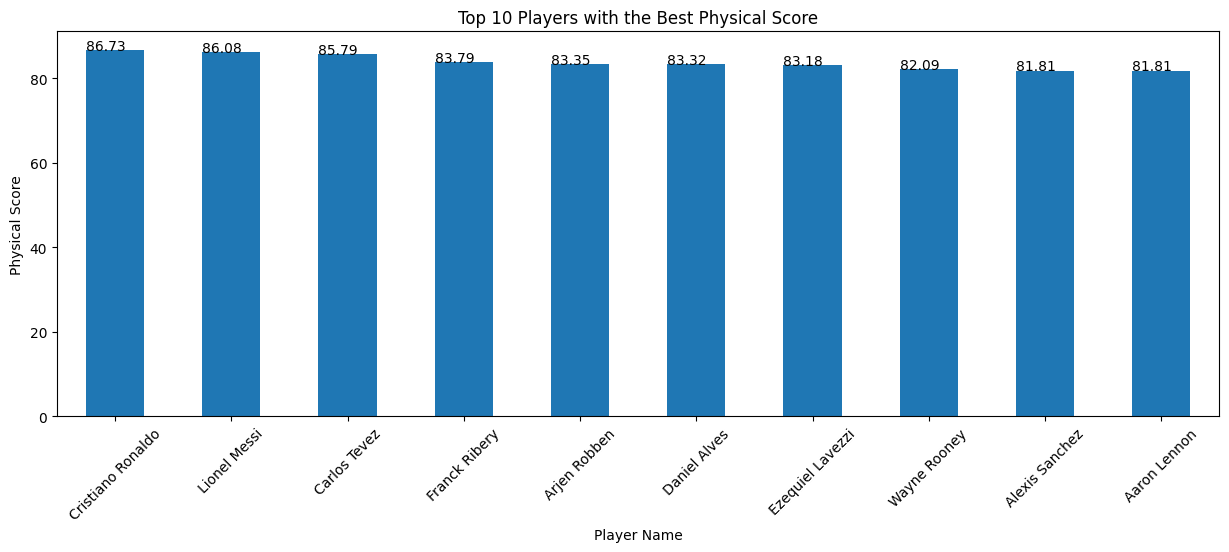

In [37]:
plot_top_players_generic(player_merge, ['overall_rating', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'stamina', 'strength'], y_label='Physical Score')

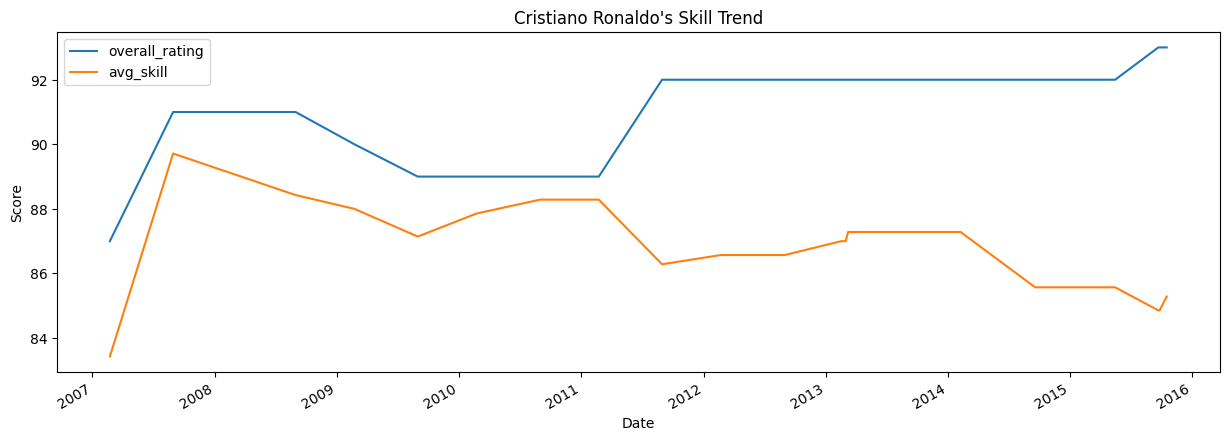

In [38]:
plot_player_skill_trend(player_merge, 'Cristiano Ronaldo', ['acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'stamina', 'strength'])

#### Defending Specs

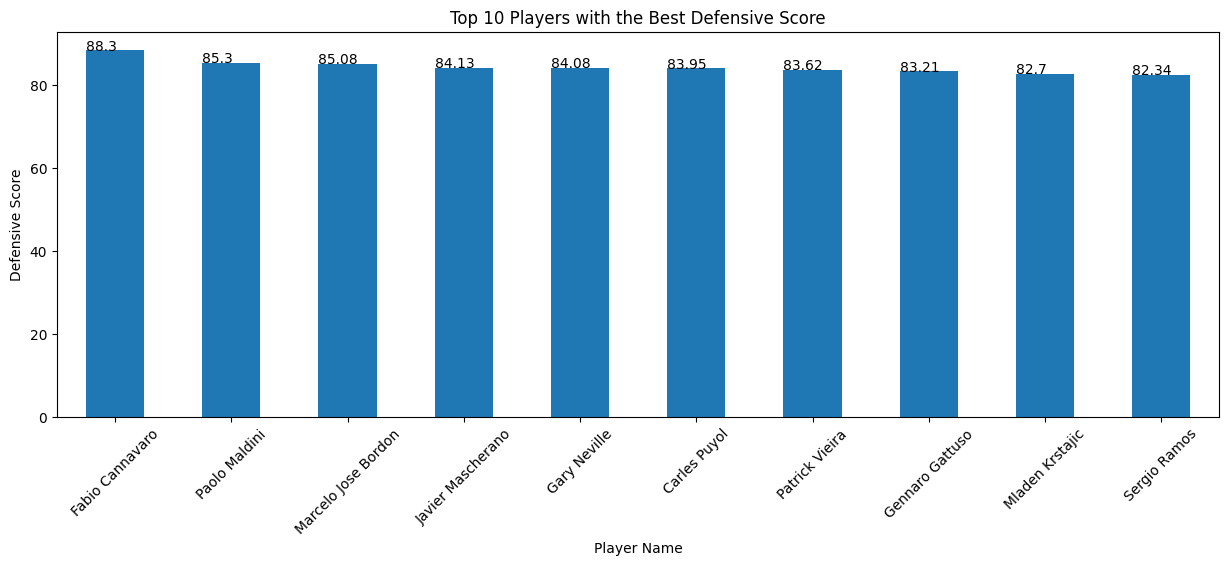

In [39]:
plot_top_players_generic(player_merge, ['overall_rating', 'interceptions', 'positioning', 'marking', 'standing_tackle', 'sliding_tackle', 'aggression'], y_label='Defensive Score')

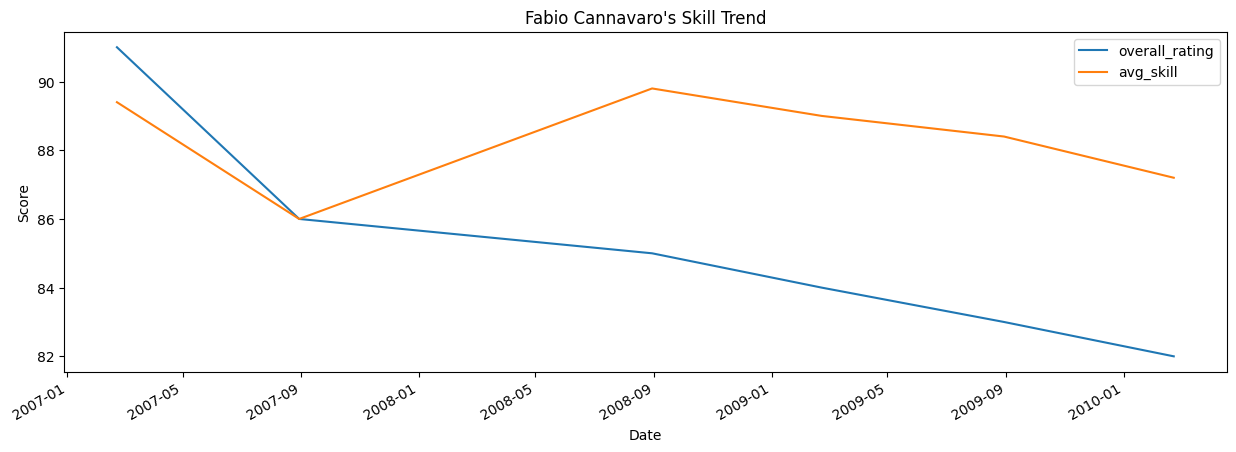

In [40]:
plot_player_skill_trend(player_merge, 'Fabio Cannavaro', ['interceptions', 'positioning', 'marking', 'standing_tackle', 'sliding_tackle', 'aggression'])

#### Skills Spec

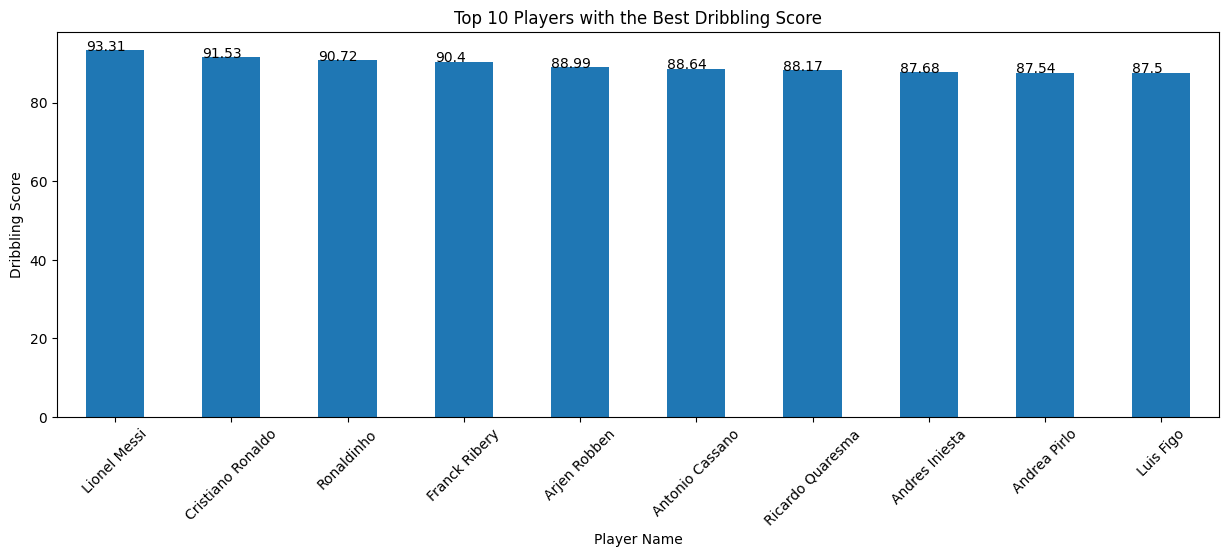

In [41]:
plot_top_players_generic(player_merge, ['overall_rating', 'dribbling', 'curve', 'ball_control'], y_label='Dribbling Score')

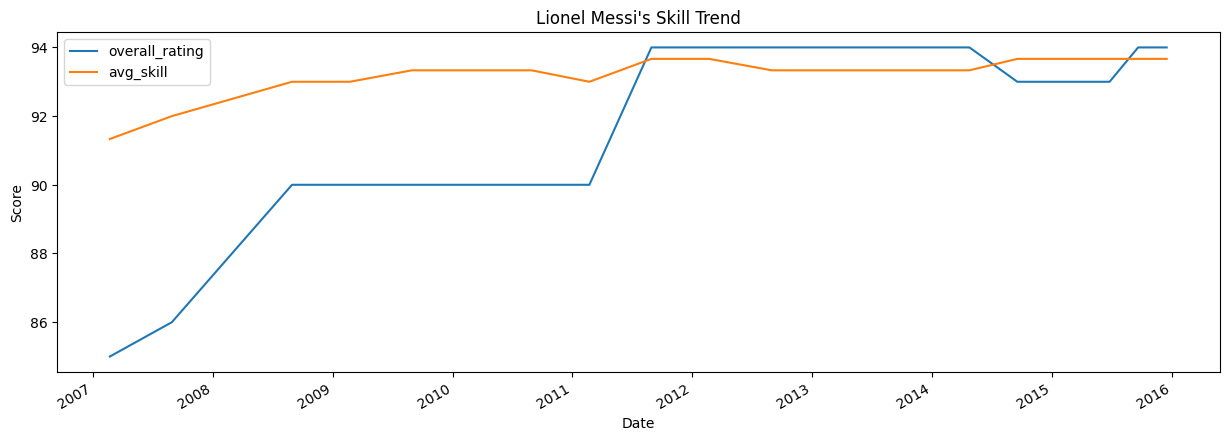

In [42]:
plot_player_skill_trend(player_merge, 'Lionel Messi', ['dribbling', 'curve', 'ball_control'])

#### Goalkeeper Specs

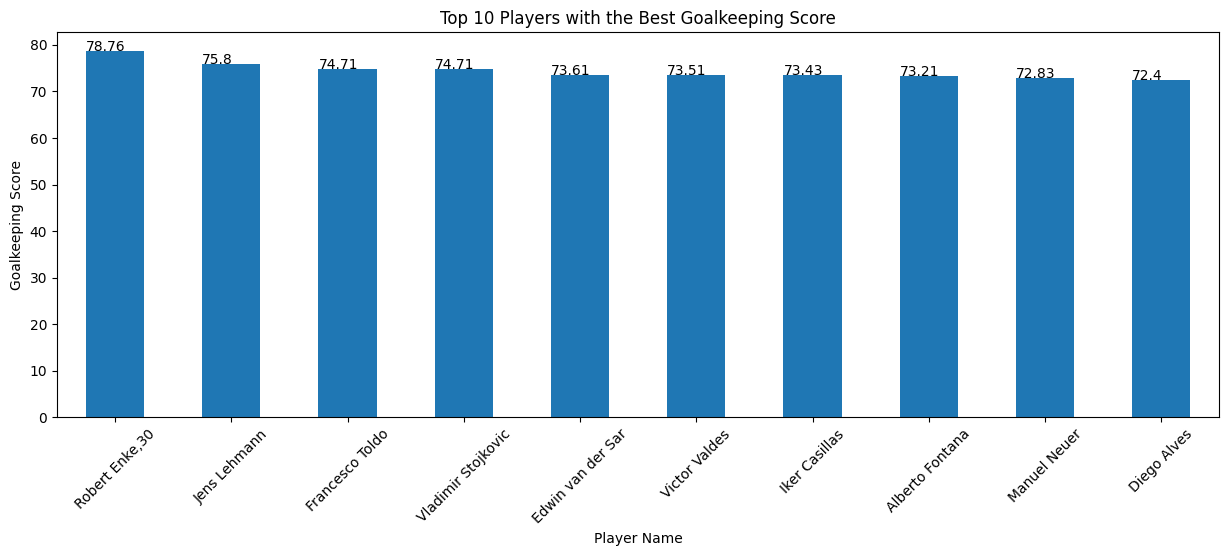

In [43]:
plot_top_players_generic(player_merge, ['overall_rating', 'agility', 'reactions', 'jumping', 'positioning', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'], y_label='Goalkeeping Score')

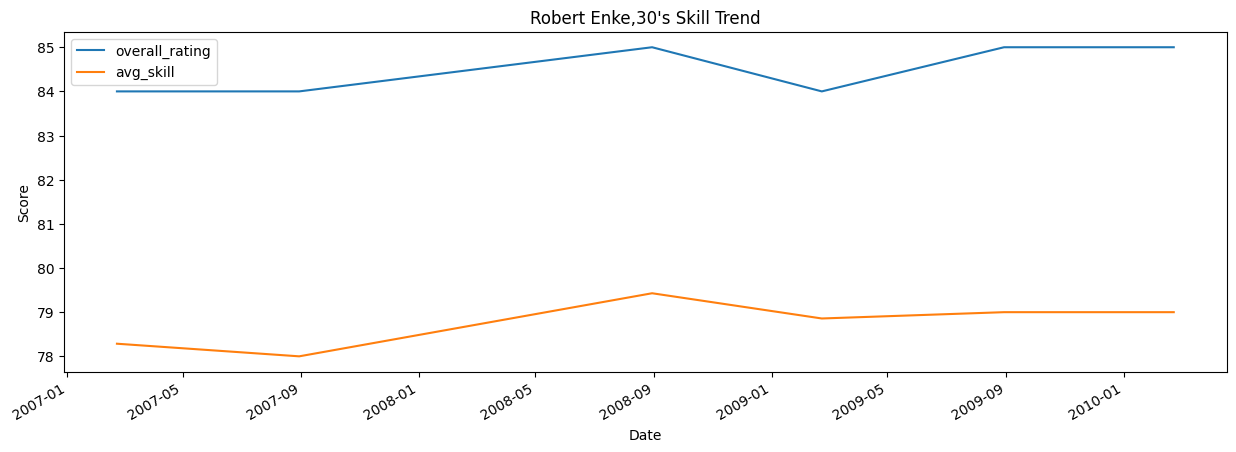

In [44]:
plot_player_skill_trend(player_merge, 'Robert Enke,30', ['agility', 'reactions', 'jumping', 'positioning', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'])

NOTE: Robert Enke has deceased at the age of 30.

### Match Related

#### Match Stats

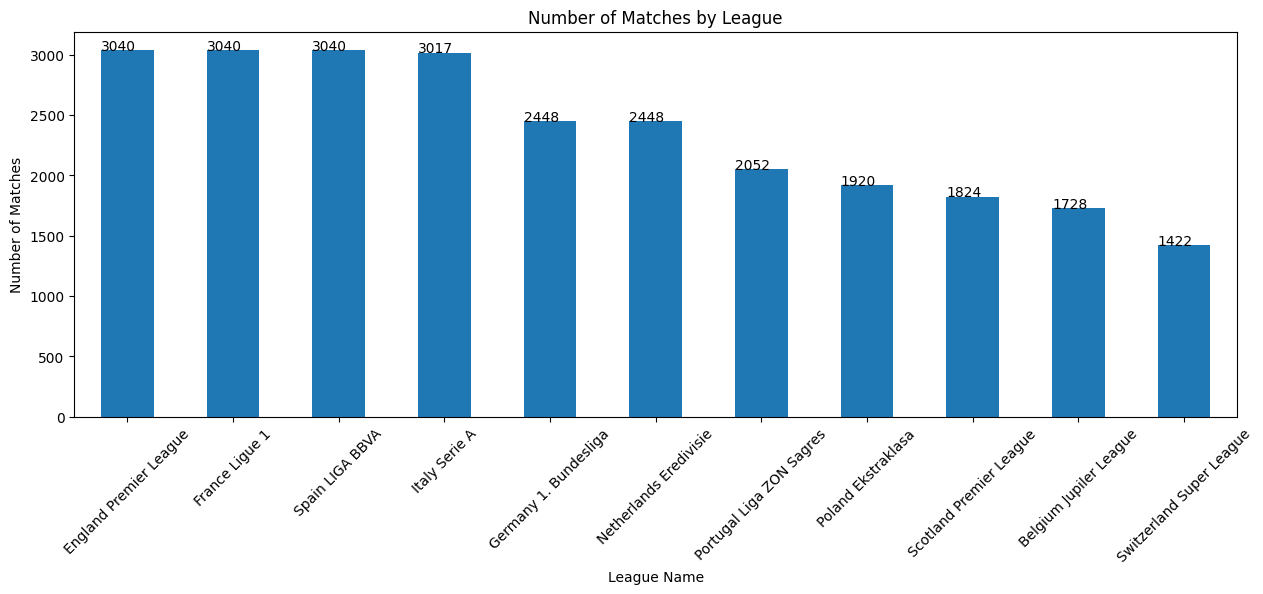

In [45]:
match_stats_df['league_id'].value_counts()
match_stats_df['league_name'] = match_stats_df['league_id'].map(country_leagues.set_index('id')['league_name'])
match_stats_df['league_name'].value_counts()

match_stats_df['league_name'].value_counts().plot(kind='bar', figsize=(15, 5))
plt.title('Number of Matches by League')
for i, v in enumerate(match_stats_df['league_name'].value_counts()):
    plt.text(i - 0.25, v + 0.01, str(v))
plt.xlabel('League Name')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()

The English Premier League, France League 1, and the Spanish LaLiga have the highest number of played matches as compared to other leagues.

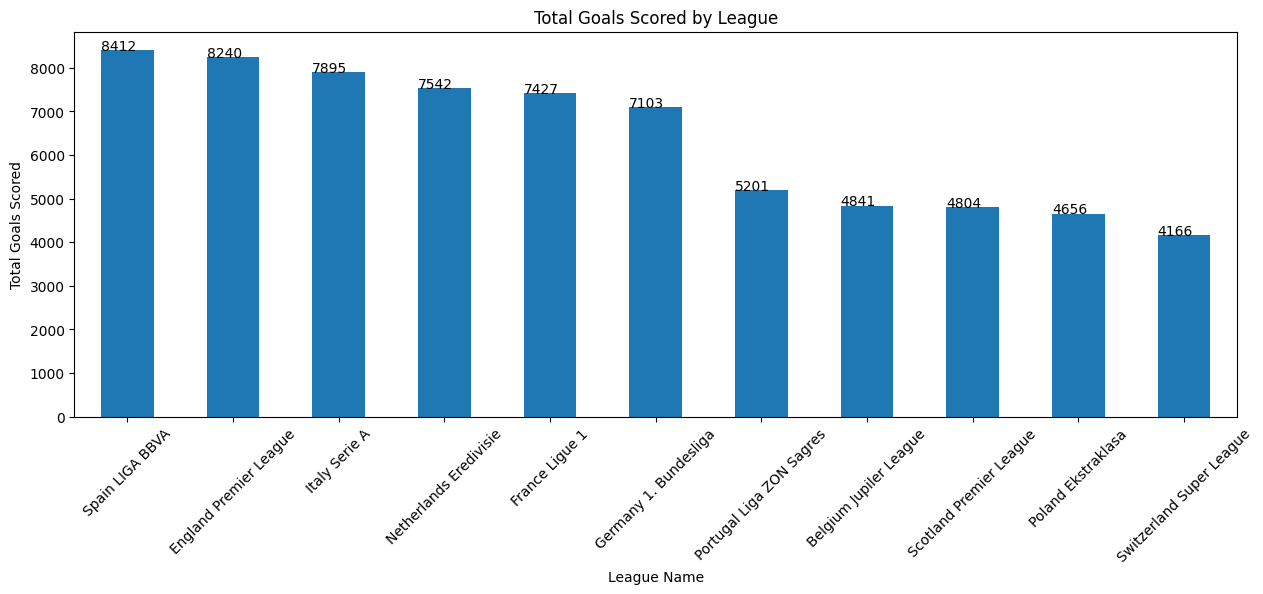

In [46]:
match_stats_df['total_goals'] = match_stats_df['home_team_goal'] + match_stats_df['away_team_goal']
match_stats_df.groupby('league_name')['total_goals'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(15, 5))
plt.title('Total Goals Scored by League')
for i, v in enumerate(match_stats_df.groupby('league_name')['total_goals'].sum().sort_values(ascending=False)):
    plt.text(i - 0.25, v + 0.01, str(v))
plt.xlabel('League Name')
plt.ylabel('Total Goals Scored')
plt.xticks(rotation=45)
plt.show()

Many goals are scored in the Spanish LaLiga.

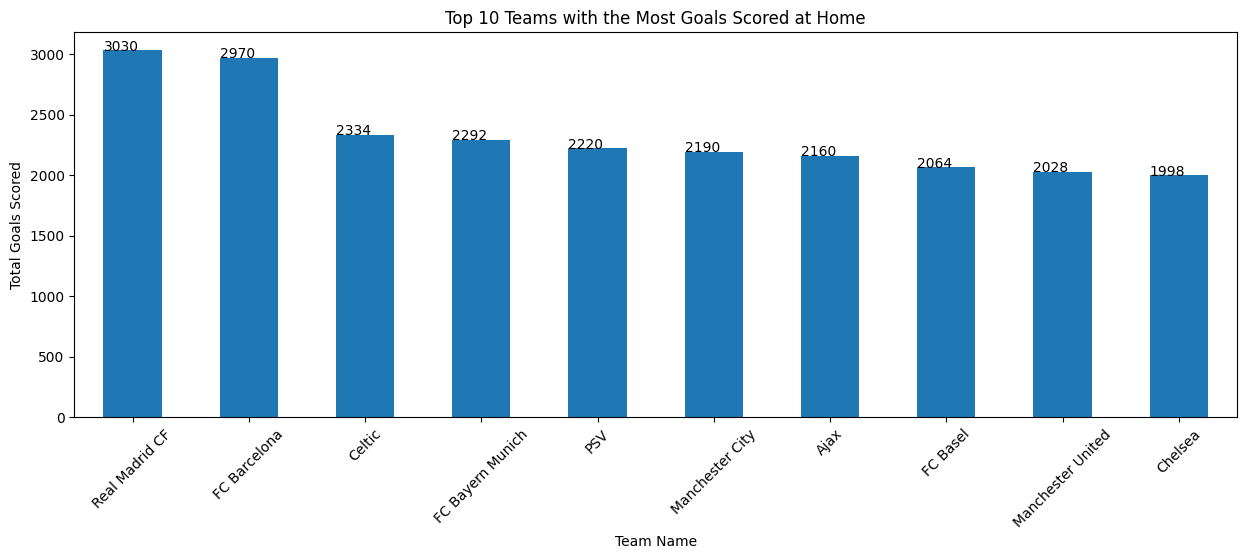

In [47]:
match_stats_names = match_stats_df.copy()
match_stats_names = match_stats_names.merge(team_merge, left_on='home_team_api_id', right_on='team_api_id')
match_stats_names = match_stats_names[['team_long_name', 'home_team_goal']]
match_stats_names = match_stats_names.groupby('team_long_name').sum().sort_values(by='home_team_goal', ascending=False)
match_stats_names = match_stats_names.iloc[:10, :]
match_stats_names['home_team_goal'].plot(kind='bar', figsize=(15, 5))
plt.title('Top 10 Teams with the Most Goals Scored at Home')
for i, v in enumerate(match_stats_names['home_team_goal']):
    plt.text(i - 0.25, v + 0.01, str(v))
plt.xlabel('Team Name')
plt.ylabel('Total Goals Scored')
plt.xticks(rotation=45) 
plt.show()

Real Madrid has scored more home goals among other teams in this dataset.

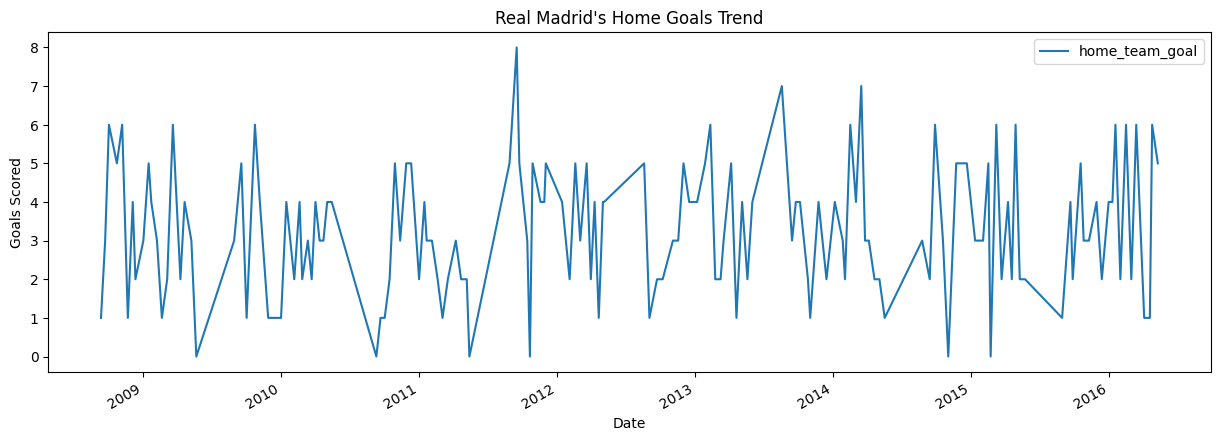

In [48]:
realmadrid = match_stats_df[match_stats_df['home_team_api_id'] == 8634]
realmadrid = realmadrid[['date', 'home_team_goal']]
realmadrid = realmadrid.sort_values(by='date')
realmadrid = realmadrid.set_index('date')
realmadrid.plot(figsize=(15, 5))
plt.title('Real Madrid\'s Home Goals Trend')
plt.xlabel('Date')
plt.ylabel('Goals Scored')
plt.show()

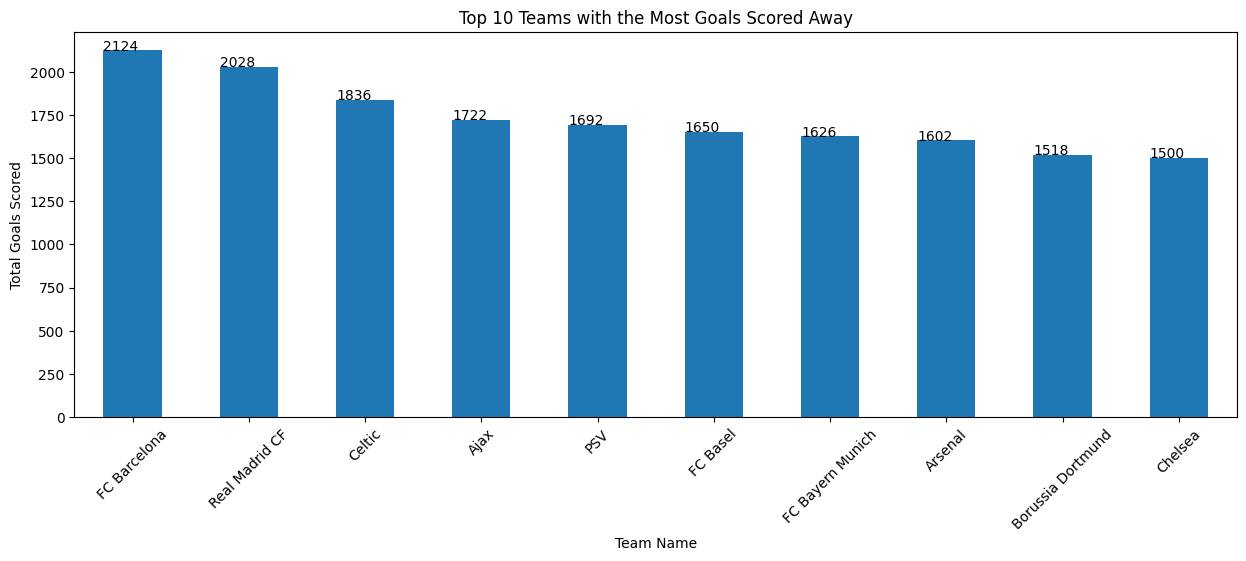

In [49]:
match_stats_names = match_stats_df.copy()
match_stats_names = match_stats_names.merge(team_merge, left_on='away_team_api_id', right_on='team_api_id')
match_stats_names = match_stats_names[['team_long_name', 'away_team_goal']]
match_stats_names = match_stats_names.groupby('team_long_name').sum().sort_values(by='away_team_goal', ascending=False)
match_stats_names = match_stats_names.iloc[:10, :]
match_stats_names['away_team_goal'].plot(kind='bar', figsize=(15, 5))
plt.title('Top 10 Teams with the Most Goals Scored Away')
for i, v in enumerate(match_stats_names['away_team_goal']):
    plt.text(i - 0.25, v + 0.01, str(v))
plt.xlabel('Team Name')
plt.ylabel('Total Goals Scored')
plt.xticks(rotation=45)
plt.show()

Barcelona has scores more goals away than any other teams.

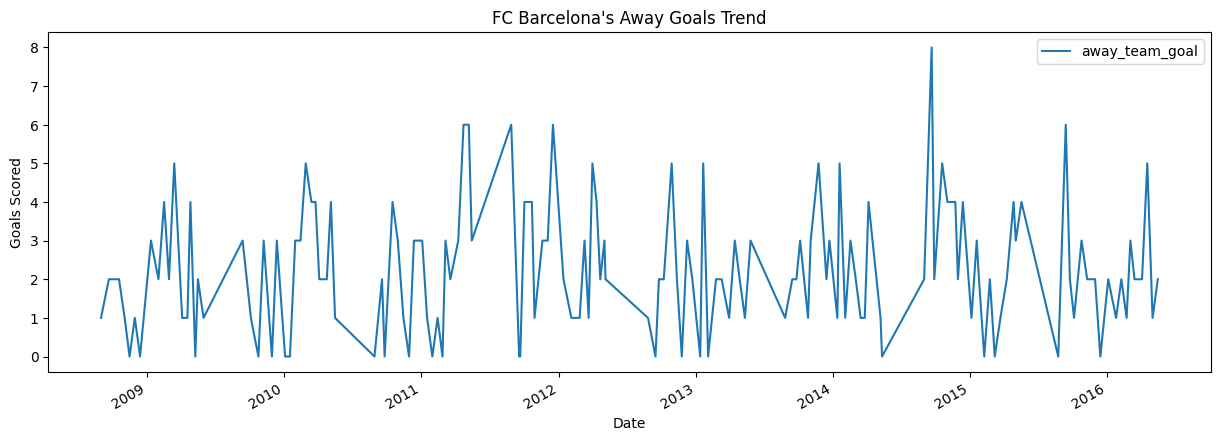

In [50]:
barcelona = match_stats_df[match_stats_df['away_team_api_id'] == 8633]
barcelona = barcelona[['date', 'away_team_goal']]
barcelona = barcelona.sort_values(by='date')
barcelona = barcelona.set_index('date')
barcelona.plot(figsize=(15, 5))
plt.title('FC Barcelona\'s Away Goals Trend')
plt.xlabel('Date')
plt.ylabel('Goals Scored')
plt.show()

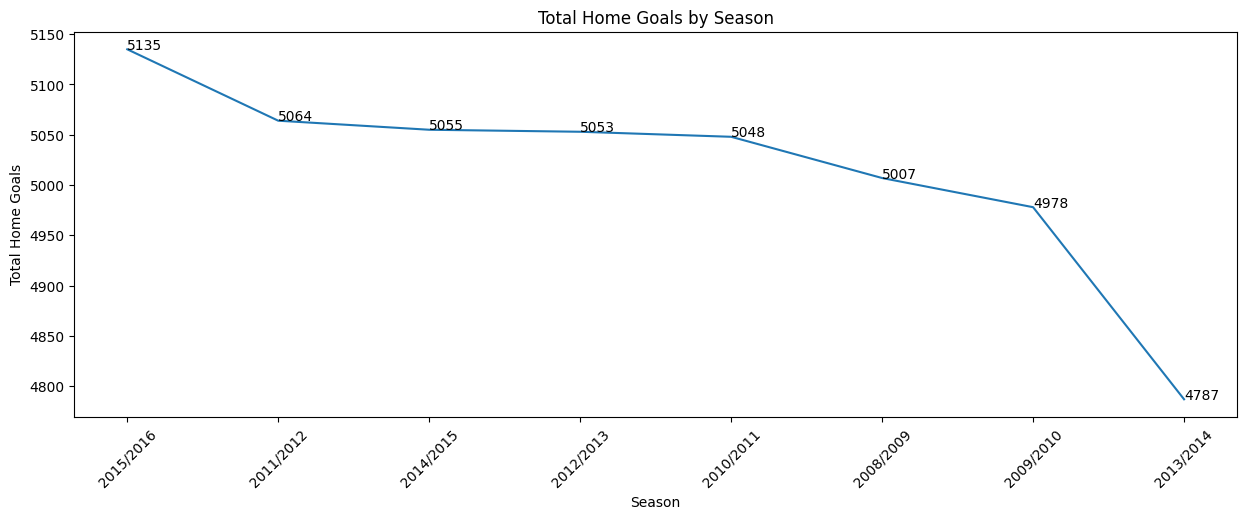

In [51]:
match_stats_df.groupby('season')['home_team_goal'].sum().sort_values(ascending=False).plot(figsize=(15, 5))
for index, value in enumerate(match_stats_df.groupby('season')['home_team_goal'].sum().sort_values(ascending=False)):
    plt.text(index, value, str(value))
plt.title('Total Home Goals by Season')
plt.xlabel('Season')
plt.ylabel('Total Home Goals')
plt.xticks(rotation=45)
plt.show()

Home team goals have been decreasing therough out the years.

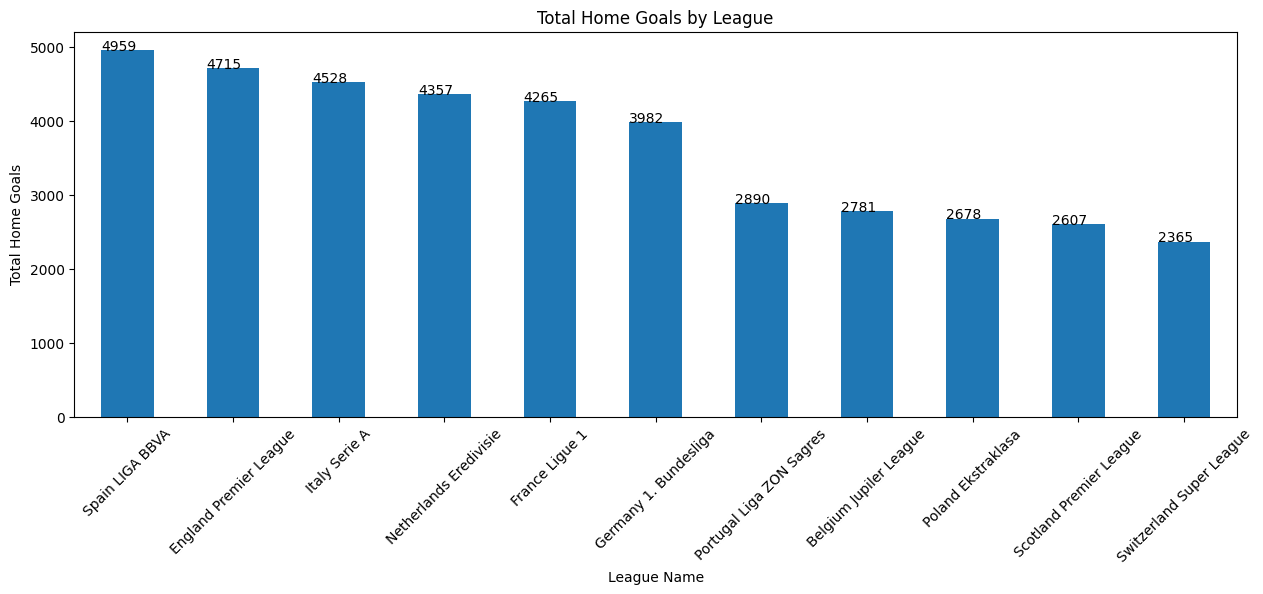

In [52]:
# which leagues has the home team goal scored
match_stats_names = match_stats_df.copy()
match_stats_names = match_stats_names.merge(country_leagues, left_on='league_id', right_on='id')
match_stats_names = match_stats_names[['league_name_x', 'home_team_goal']]
match_stats_names = match_stats_names.groupby('league_name_x').sum().sort_values(by='home_team_goal', ascending=False)
match_stats_names['home_team_goal'].plot(kind='bar', figsize=(15, 5))
plt.title('Total Home Goals by League')
for i, v in enumerate(match_stats_names['home_team_goal']):
    plt.text(i - 0.25, v + 0.01, str(v))
plt.xlabel('League Name')
plt.ylabel('Total Home Goals')
plt.xticks(rotation=45)
plt.show()


Home teams in the laliga have scored many goals.

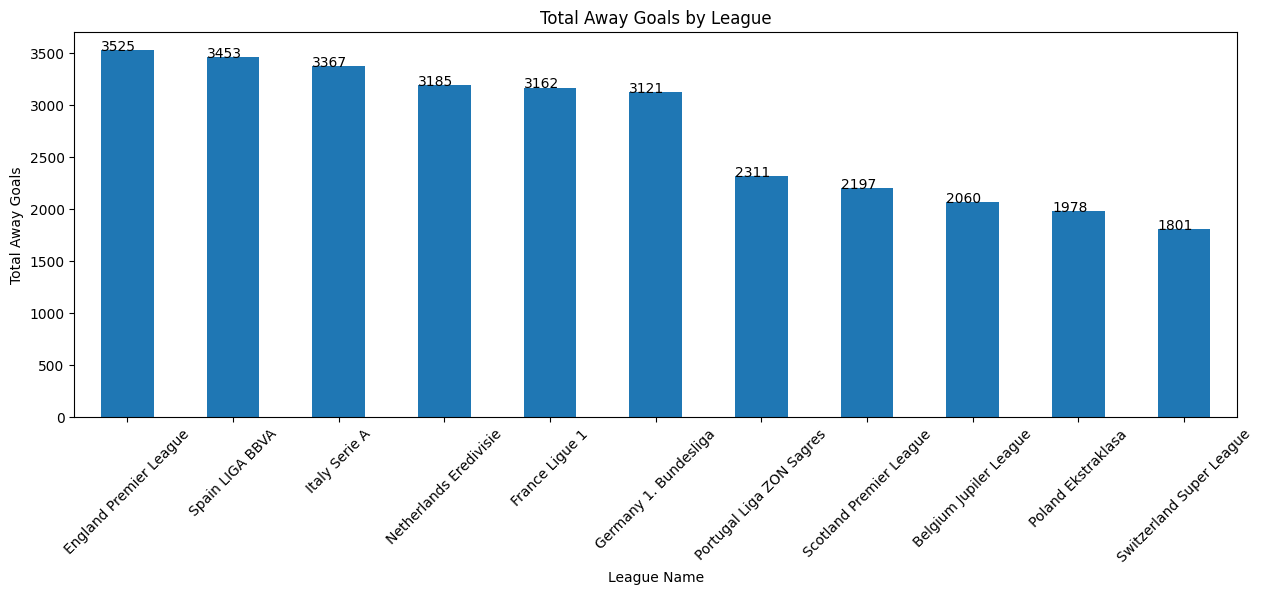

In [53]:
match_stats_names = match_stats_df.copy()
match_stats_names = match_stats_names.merge(country_leagues, left_on='league_id', right_on='id')
match_stats_names = match_stats_names[['league_name_x', 'away_team_goal']]
match_stats_names = match_stats_names.groupby('league_name_x').sum().sort_values(by='away_team_goal', ascending=False)
match_stats_names['away_team_goal'].plot(kind='bar', figsize=(15, 5))
plt.title('Total Away Goals by League')
for i, v in enumerate(match_stats_names['away_team_goal']):
    plt.text(i - 0.25, v + 0.01, str(v))
plt.xlabel('League Name')
plt.ylabel('Total Away Goals')
plt.xticks(rotation=45)
plt.show()

#### Betting odds analysis

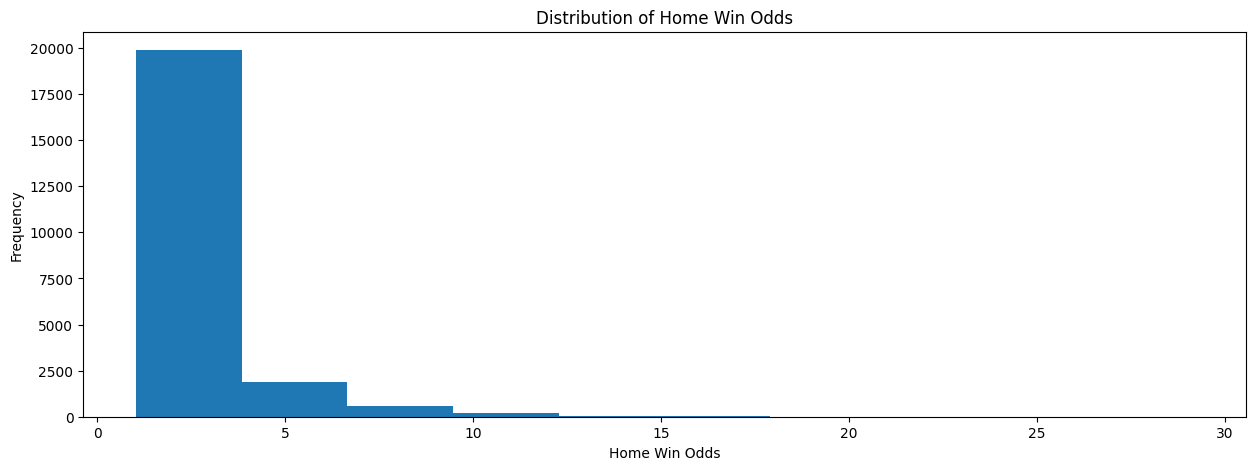

In [54]:
betting_df['home_win_odds'] = betting_df[['B365H', 'BSH', 'BWH', 'GBH', 'IWH', 'LBH', 'PSH', 'SJH', 'VCH', 'WHH']].mean(axis=1)
betting_df['home_win_odds'].plot(kind='hist', figsize=(15, 5))
plt.title('Distribution of Home Win Odds')
plt.xlabel('Home Win Odds')
plt.ylabel('Frequency')
plt.show()

In [55]:
betting_df['home_win_odds'] = betting_df[['B365H', 'BSH', 'BWH', 'GBH', 'IWH', 'LBH', 'PSH', 'SJH', 'VCH', 'WHH']].mean(axis=1)
print('Average odd for home win: ', betting_df['home_win_odds'].mean())

Average odd for home win:  2.5858331799381995


Most home win odds are in between 1.5 - 4

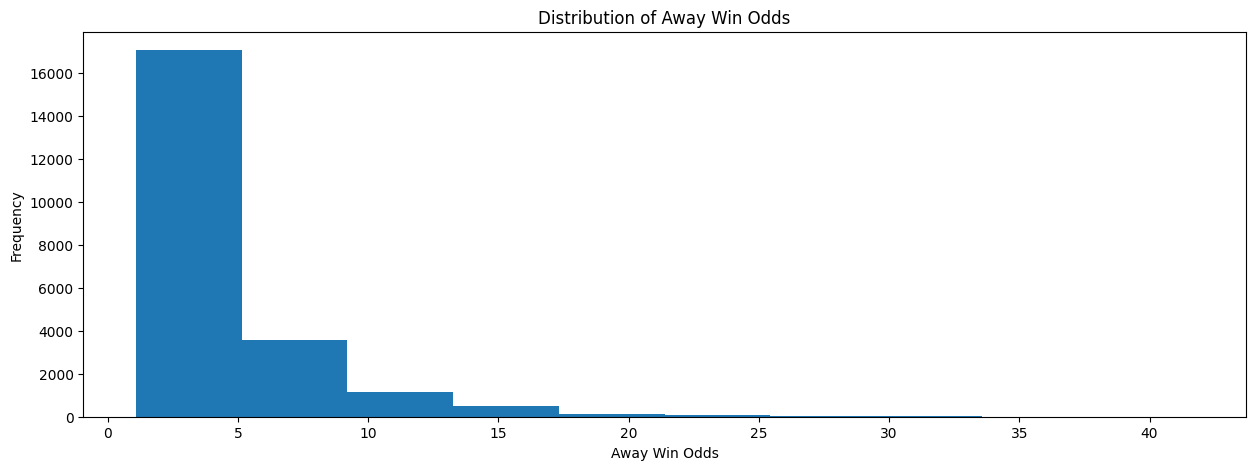

In [56]:
betting_df['away_win_odds'] = betting_df[['B365A', 'BSA', 'BWA', 'GBA', 'IWA', 'LBA', 'PSA', 'SJA', 'VCA', 'WHA']].mean(axis=1)
betting_df['away_win_odds'].plot(kind='hist', figsize=(15, 5))
plt.title('Distribution of Away Win Odds')
plt.xlabel('Away Win Odds')
plt.ylabel('Frequency')
plt.show()

In [57]:
betting_df['away_win_odds'] = betting_df[['B365A', 'BSA', 'BWA', 'GBA', 'IWA', 'LBA', 'PSA', 'SJA', 'VCA', 'WHA']].mean(axis=1)
print('Average odd for away win: ', betting_df['away_win_odds'].mean())

Average odd for away win:  4.525016021915397


We see higher number of occurences at the higher odds. Which is also reflected by the mean odd.

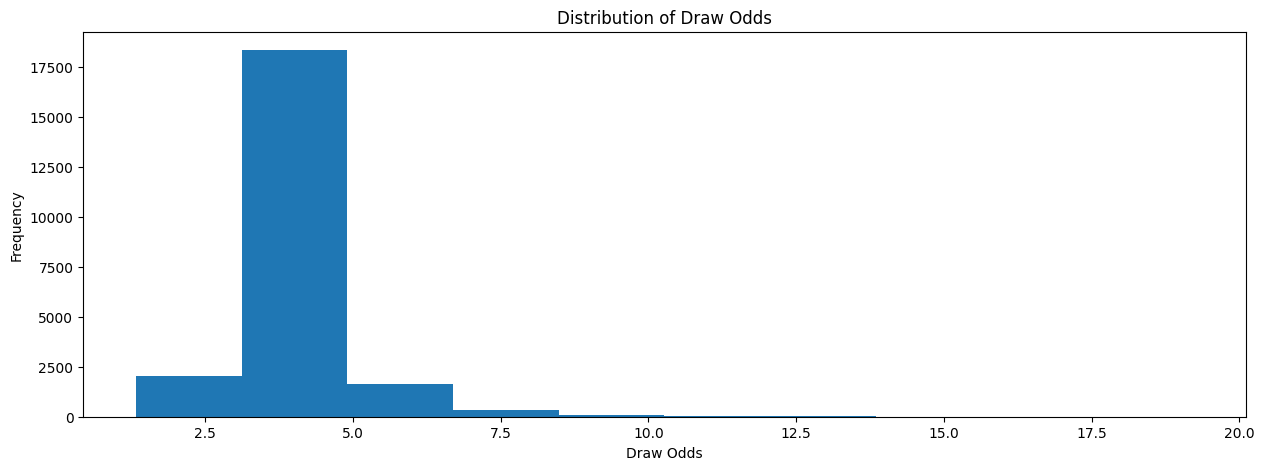

In [58]:
betting_df['draw_odds'] = betting_df[['B365D', 'BSD', 'BWD', 'GBD', 'IWD', 'LBD', 'PSD', 'SJD', 'VCD', 'WHD']].mean(axis=1)
betting_df['draw_odds'].plot(kind='hist', figsize=(15, 5))
plt.title('Distribution of Draw Odds')
plt.xlabel('Draw Odds')
plt.ylabel('Frequency')
plt.show()

In [59]:
betting_df['draw_odds'] = betting_df[['B365D', 'BSD', 'BWD', 'GBD', 'IWD', 'LBD', 'PSD', 'SJD', 'VCD', 'WHD']].mean(axis=1)
print('Average odd for draw: ', betting_df['draw_odds'].mean())

Average odd for draw:  3.766131027629739


Majority of the odds are found between 2.8 and 7.3 which indicates draw odds are higher and difficult to predict.

The average of draw odds is less than that of away win odds which indicate home teams usually get the advantages of winning.

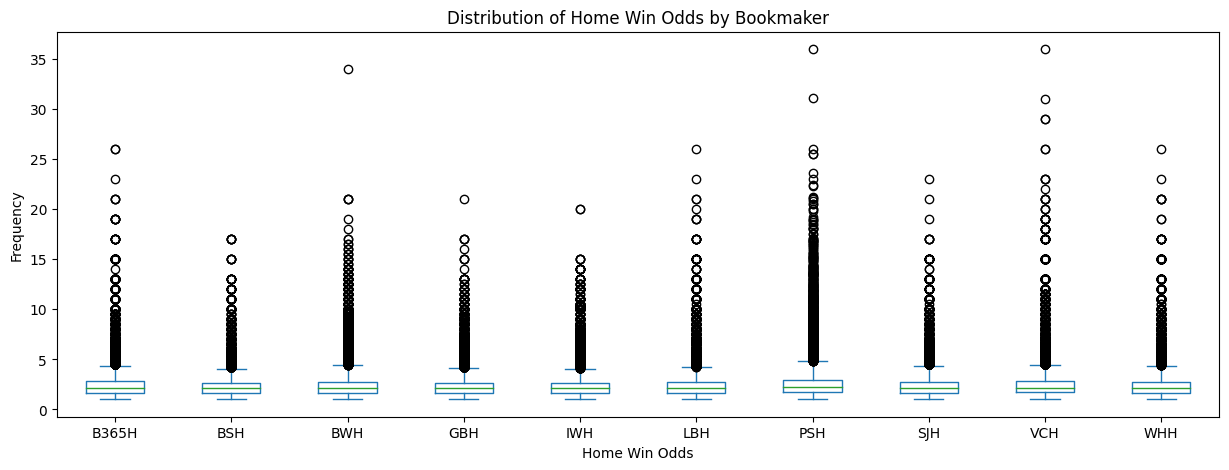

In [60]:
betting_df[['B365H', 'BSH', 'BWH', 'GBH', 'IWH', 'LBH', 'PSH', 'SJH', 'VCH', 'WHH']].plot(kind='box', figsize=(15, 5))
plt.title('Distribution of Home Win Odds by Bookmaker')
plt.xlabel('Home Win Odds')
plt.ylabel('Frequency')
plt.show()

- B365D = Bet365 draw odds
- BSD = Blue Square draw odds
- BWD = Bet&Win draw odds
- GBD = Gamebookers draw odds
- IWD = Interwetten draw odds
- LBD = Ladbrokes draw odds
- PSD = Pinnacle draw odds
- SJD = Stan James draw odds
- VCD = VC Bet draw odds
- WHD = William Hill draw odds

Blue Square provides usually odds between 0 - 20 with almost none above 20. While bookmakers like Pinnacle provide even more higher odds in some scenarios. Pinnacle is loved for its higher odds.

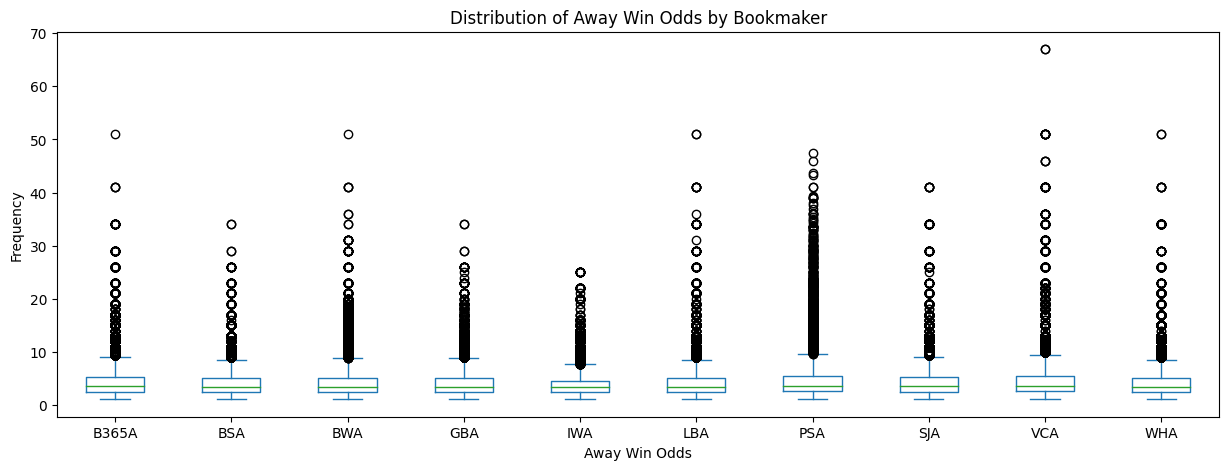

In [61]:
betting_df[['B365A', 'BSA', 'BWA', 'GBA', 'IWA', 'LBA', 'PSA', 'SJA', 'VCA', 'WHA']].plot(kind='box', figsize=(15, 5))
plt.title('Distribution of Away Win Odds by Bookmaker')
plt.xlabel('Away Win Odds')
plt.ylabel('Frequency')
plt.show()

On away win odds still Blue Square offers odds up until 40, still less than the others. Now for the highest odds we see the likes of VC Bet offering more higher odds.

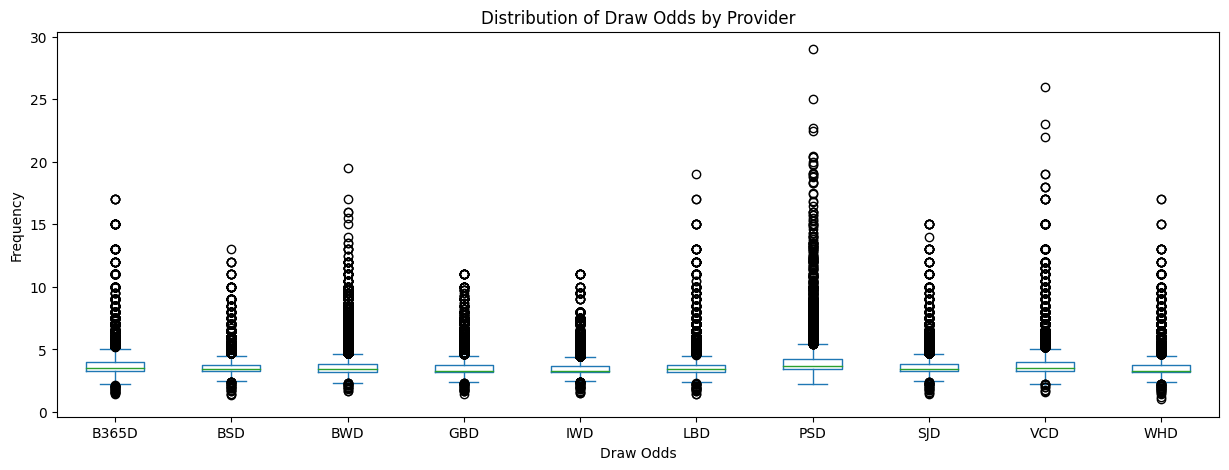

In [62]:
betting_df[['B365D', 'BSD', 'BWD', 'GBD', 'IWD', 'LBD', 'PSD', 'SJD', 'VCD', 'WHD']].plot(kind='box', figsize=(15, 5))
plt.title('Distribution of Draw Odds by Provider')
plt.xlabel('Draw Odds')
plt.ylabel('Frequency')
plt.show()

For draw odds we see that stil Blue Square offers the smallest amount of odds up until 15. While Pinnacle which is known for its higher odds goes even as twice higher. 

### Team Related

In [63]:
def plot_top_n_teams_by_metric(metric, n):
    '''
    INPUT:
    metric - string - the metric to plot
    n - int - the number of teams to plot

    OUTPUT:
    None - plots a bar chart of the top n teams by the chosen metric
    '''
    team_metric = team_merge[['team_long_name', metric]].groupby(['team_long_name']).mean().reset_index()
    team_metric = team_metric.sort_values(by=metric, ascending=False).head(n)
    team_metric = team_metric.fillna(0)
    team_metric = team_metric.sort_values(by=metric, ascending=False).head(n)
    team_metric = team_metric.set_index('team_long_name')
    team_metric.plot(kind='bar', figsize=(15, 5))
    metric_1 = re.findall('^[^A-Z]*', metric)
    metric_2 = re.findall('[A-Z][^A-Z]*', metric)
    title = ' '.join(metric_1).capitalize() + ' ' + ' '.join(metric_2)
    plt.title('Top {} Teams with the Highest {}'.format(n, (title)))
    for i, v in enumerate(team_metric[metric]):
        plt.text(i, v, str(round(v, 2)))
    plt.xlabel('Team Name')
    plt.ylabel(title)
    plt.xticks(rotation=45)
    plt.show()

**Definition:** build up essentially means getting the ball into the opponent's half to create an attacking opportunity.

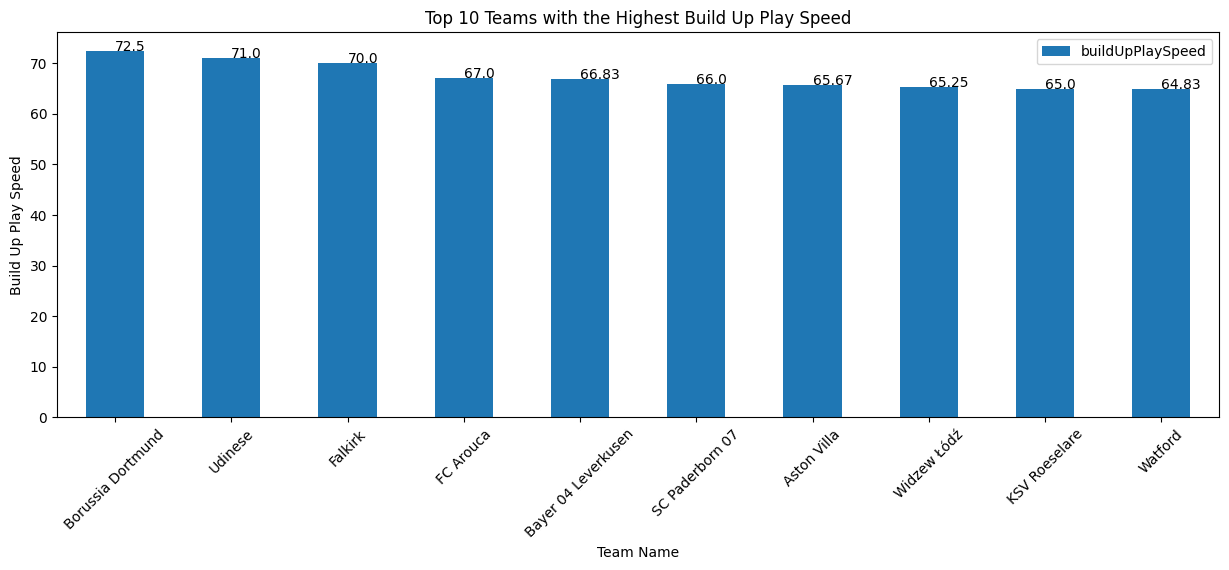

In [64]:
plot_top_n_teams_by_metric('buildUpPlaySpeed', 10)

Borussia Dortmund have a faster build up play speed.

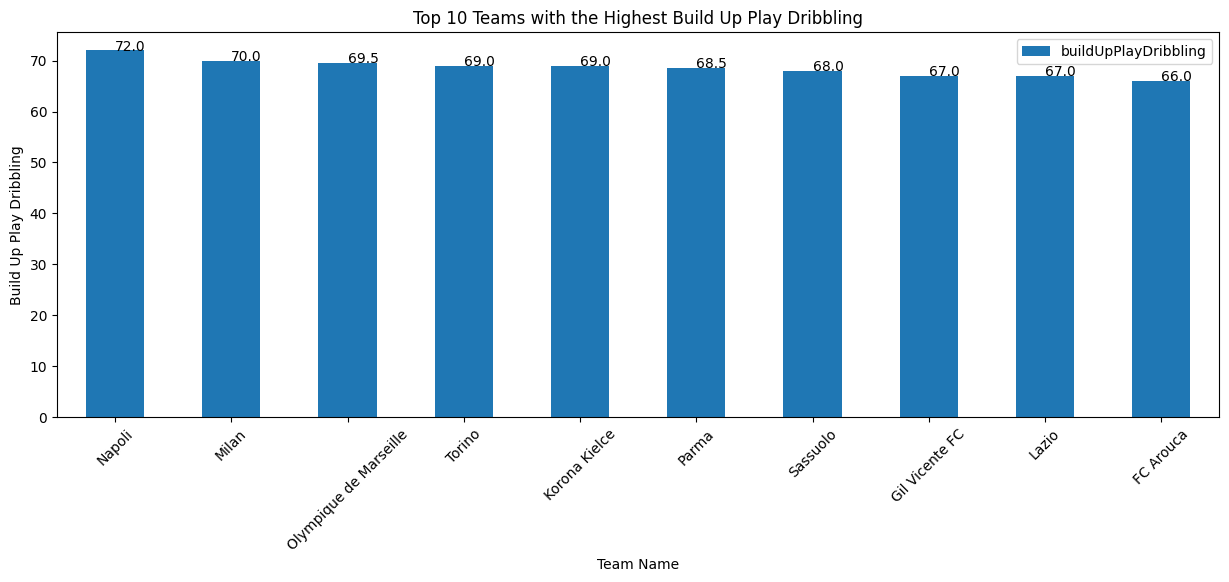

In [65]:
plot_top_n_teams_by_metric('buildUpPlayDribbling', 10)

Napoli showcase higher dribbling rates when building up.

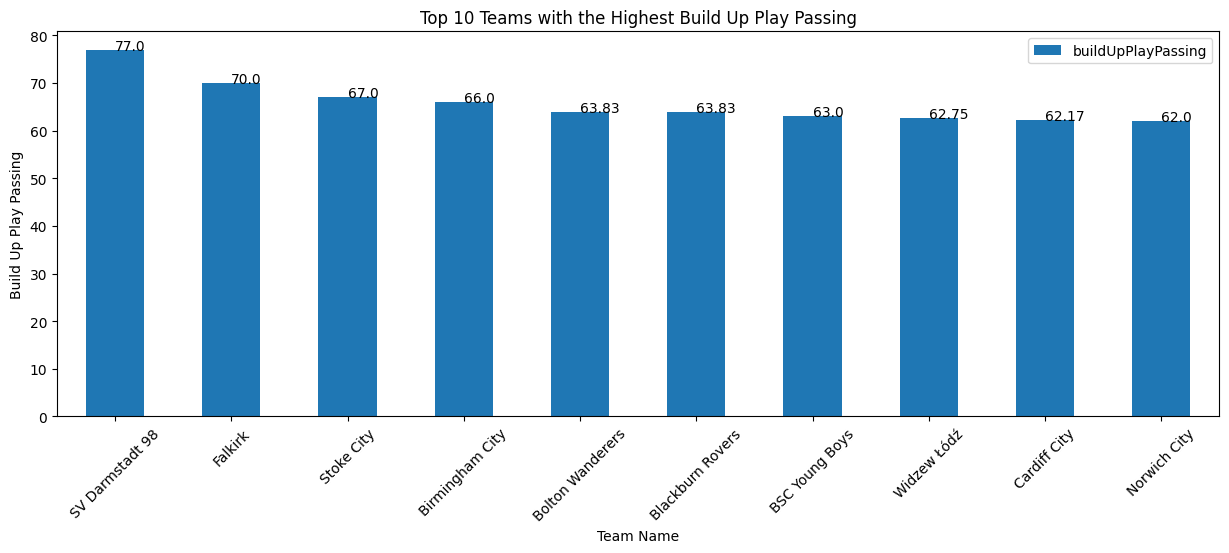

In [66]:
plot_top_n_teams_by_metric('buildUpPlayPassing', 10)

SV Darmstadt 98 score the highest in the aspect of passing when building up.

**Definition:** Chance creation is technically, key passes are a pass leading to a shot that does not result in a goal. 

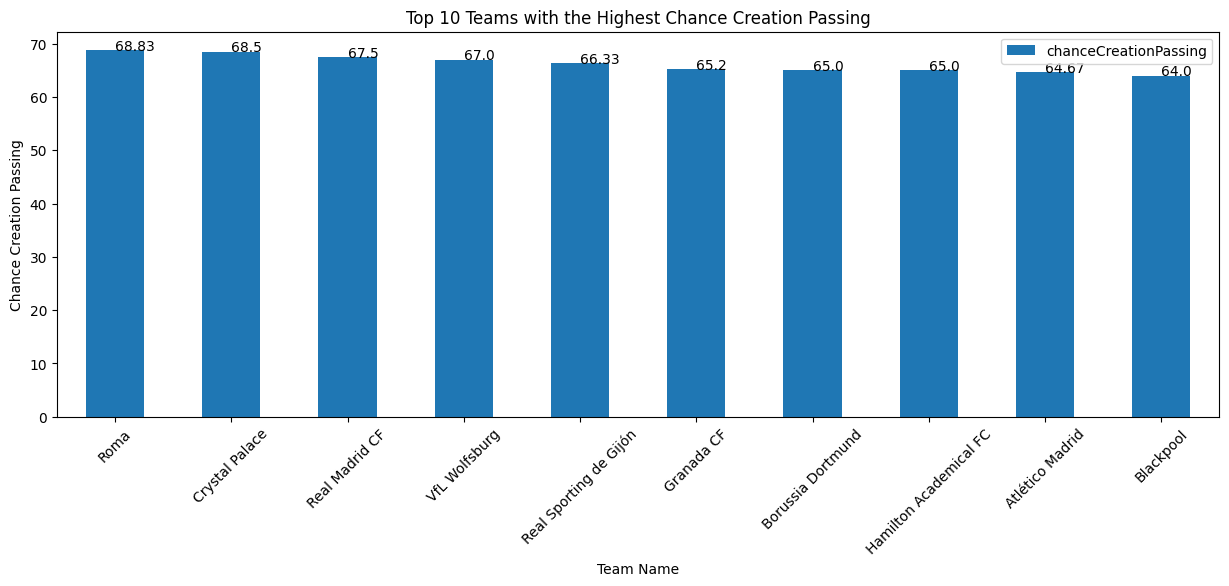

In [67]:
plot_top_n_teams_by_metric('chanceCreationPassing', 10)

Roma rank the highet in terms of chance creation through passing.

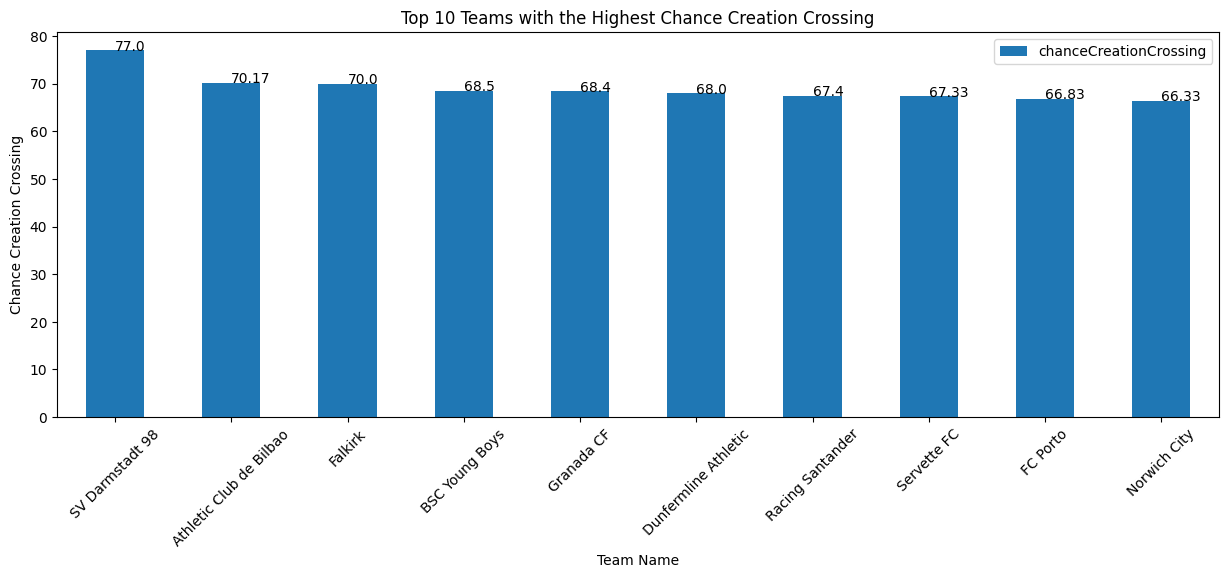

In [68]:
plot_top_n_teams_by_metric('chanceCreationCrossing', 10)

Sv Darmstadt rank the highest in terms of using crossing to create chances.

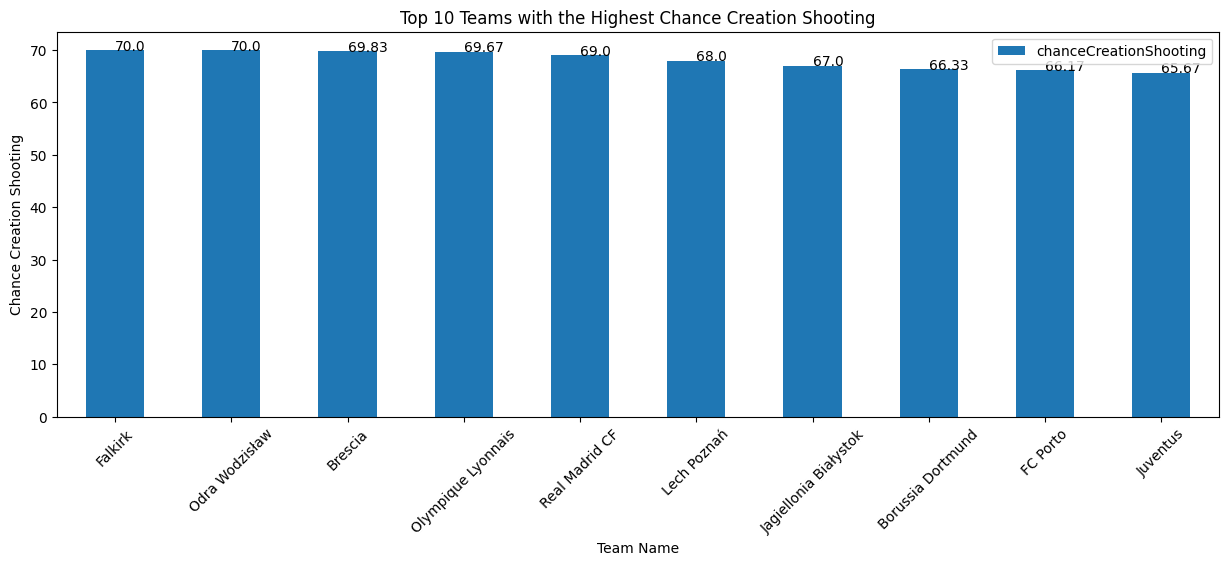

In [69]:
plot_top_n_teams_by_metric('chanceCreationShooting', 10)

Falkirk create more chances with shooting and are highest among all other teams.

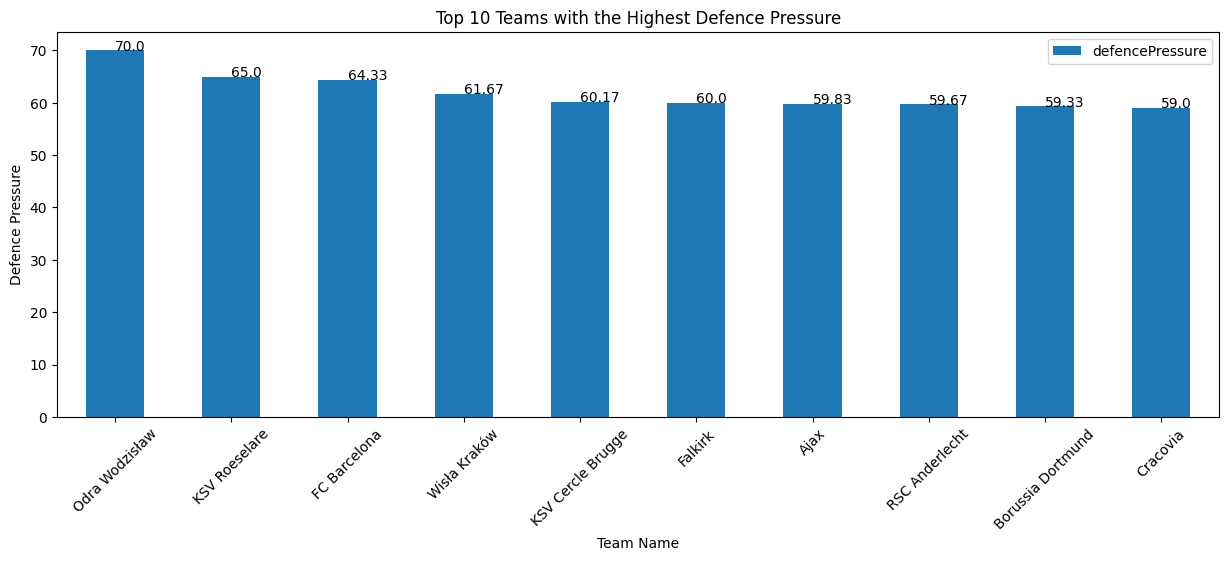

In [70]:
plot_top_n_teams_by_metric('defencePressure', 10)

The team Odra Wodziaslaw have the highest defence pressure specs.

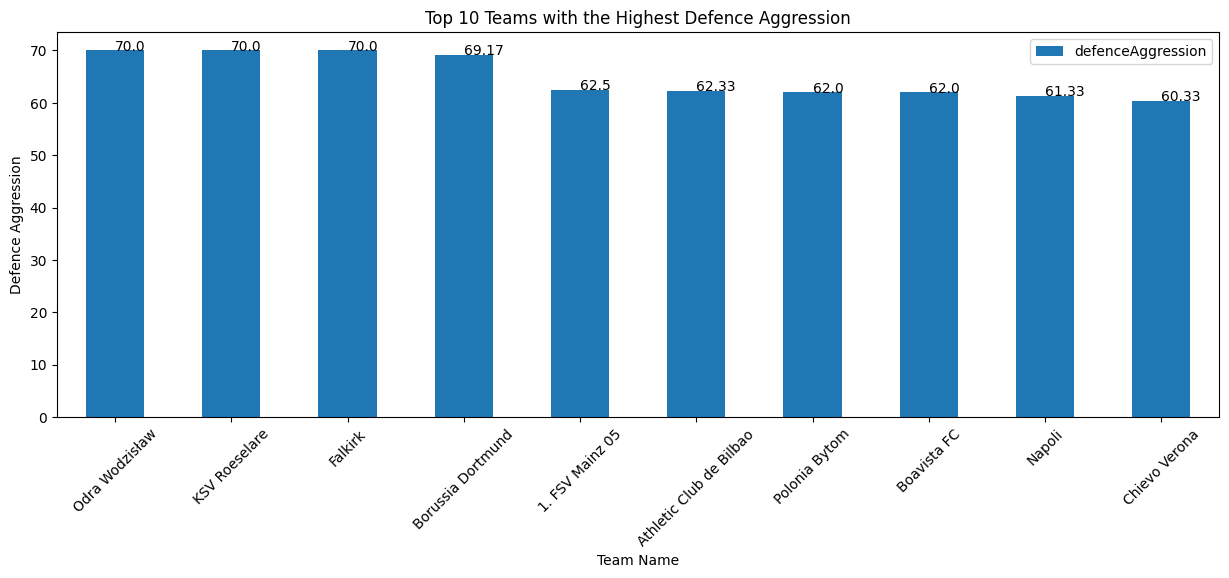

In [71]:
plot_top_n_teams_by_metric('defenceAggression', 10)

The team Odra Wodziaslaw have the highest defence agression specs.

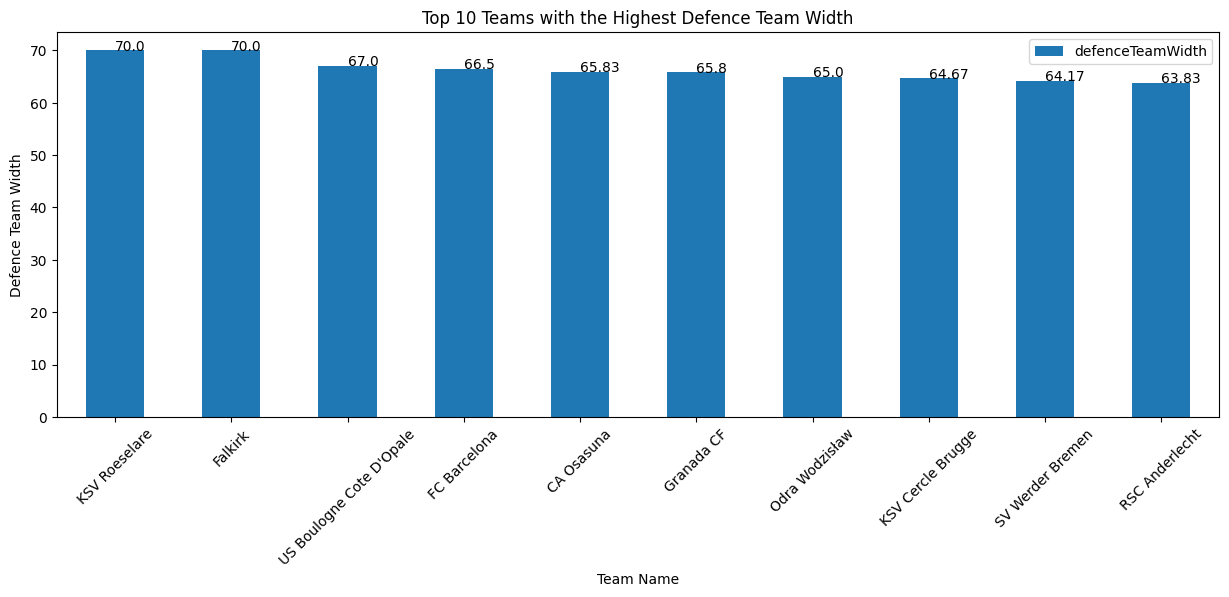

In [72]:
plot_top_n_teams_by_metric('defenceTeamWidth', 10)

The team KSV Roeselare have the highest defence team width specs.

Teams defensive width represents how well the team covers all positions including the fiels flanks and midfield.

Odra Wodziaslaw seems to be a very defesive team from the stats that we see above.

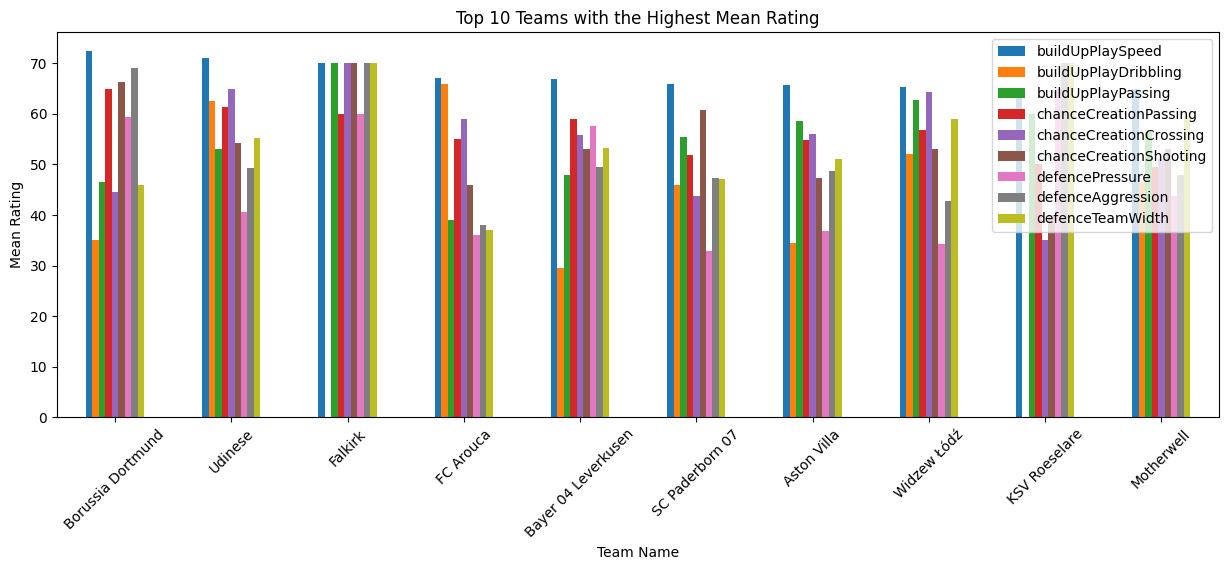

In [73]:
team_metric = team_merge[['team_long_name', 'buildUpPlaySpeed', 'buildUpPlayDribbling', 'buildUpPlayPassing', 'chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting', 'defencePressure', 'defenceAggression', 'defenceTeamWidth']].groupby(['team_long_name']).mean().reset_index()
team_metric_w_name = team_metric.copy()
team_metric = team_metric.sort_values(by=['buildUpPlaySpeed', 'buildUpPlayDribbling', 'buildUpPlayPassing', 'chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting', 'defencePressure', 'defenceAggression', 'defenceTeamWidth'], ascending=False).head(10)
team_metric = team_metric.fillna(0)
team_metric = team_metric.set_index('team_long_name')
team_metric.plot(kind='bar', figsize=(15, 5))
plt.title('Top 10 Teams with the Highest Mean Rating')
plt.xlabel('Team Name')
plt.ylabel('Mean Rating')
plt.xticks(rotation=45)
plt.show()

Borussia Dortmund ranked the best team in terms of the stats that were used for comaprison.

This can be clearly shown with the trophies they won

Bundesliga
- 2010-2011 season
- 2011-2012 season 

DFB-Pokal (German Cup)
- 2011-2012 season
- 2013-2014 season
- 2016-2017 season 

DFL-Supercup (German Super Cup)
- 2008
- 2013
- 2014

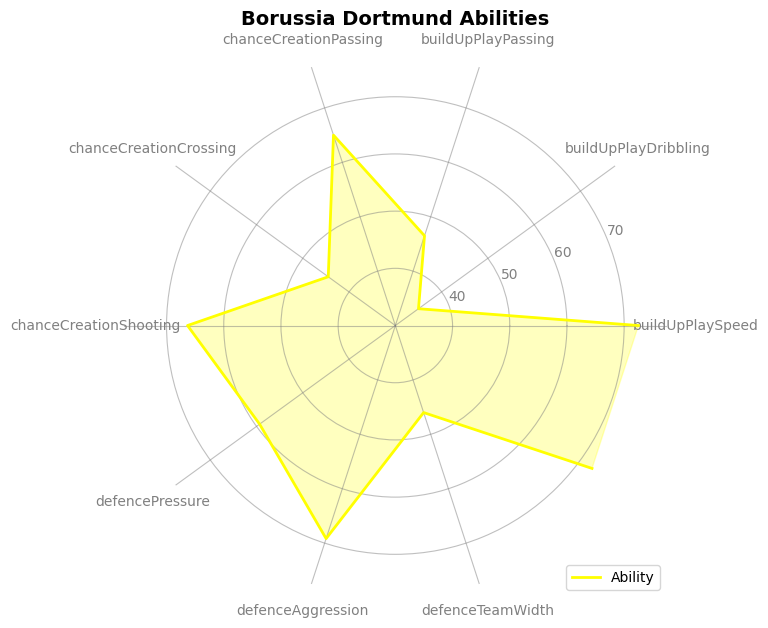

In [74]:
# Filter the data for Borussia Dortmund
team_name = 'Borussia Dortmund'
team_data = team_metric_w_name[team_metric_w_name['team_long_name'] == team_name]

# Define the attributes and their corresponding values
attributes = ['buildUpPlaySpeed', 'buildUpPlayDribbling', 'buildUpPlayPassing',
              'chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting',
              'defencePressure', 'defenceAggression', 'defenceTeamWidth']

values = team_data.loc[:, attributes].values[0].tolist()

# Duplicate the first attribute to complete the circular shape
attributes.append(attributes[0])
values.append(values[0])

# Calculate angles for each attribute
angles = np.linspace(0, 2 * np.pi, len(attributes), endpoint=False).tolist()

# Make a polar plot
plt.figure(figsize=(8, 8))
plt.subplot(polar=True)

# Plot the values
plt.plot(angles, values, color='yellow', linewidth=2)
plt.fill(angles, values, alpha=0.25, color='yellow')

# Set the labels and title
plt.xticks(angles[:-1], attributes[:-1], color='grey', size=10)
plt.yticks(color='grey', size=10)
plt.title(f'{team_name} Abilities', size=14, color='black', weight='bold')

# Set the limit for each axis
plt.ylim(min(values) - 5, max(values) + 5)

# Customize grid lines
plt.grid(color='grey', alpha=0.5)

# Customize the background color
plt.gca().set_facecolor('white')

# Remove spines
plt.gca().spines['polar'].set_visible(False)

# Add legend
legend_labels = ['Ability']
plt.legend(legend_labels, loc='lower right', fontsize=10)

# Add a grid line at each attribute
plt.xticks(angles[:-1], attributes[:-1], color='grey', size=10)
plt.yticks(color='grey', size=10)
plt.tick_params(axis='x', pad=10)

# Set the label positions radially outward
ax = plt.gca()
for label, angle in zip(ax.get_xticklabels(), angles):
    x, y = label.get_position()

# Adjust the padding between the plot and title
plt.tight_layout(pad=2)

# Display the plot
plt.show()


They have stronger stats on almost all of the above aspects that we discussed. Except for Build up play passing and Build up play dribbling.

## Hypothesis Testing

#### Left footed players and attacking stats

- Null Hypothesis: Left footed players attacking stats is the same as compared to right footed players.
- Alternative Hypothesis: Left footed players have higher attacking stats as comapred to right footed players.

In [75]:
right_footed_split = player_merge[player_merge['preferred_foot'] == 'right']
left_footed_split = player_merge[player_merge['preferred_foot'] == 'left']

alpha = 0.05

right_footed_split['mean'] = right_footed_split[['finishing', 'volleys', 'free_kick_accuracy', 'shot_power', 'long_shots', 'penalties']].mean(axis=1)
left_footed_split['mean'] = left_footed_split[['finishing', 'volleys', 'free_kick_accuracy', 'shot_power', 'long_shots', 'penalties']].mean(axis=1)
# perform t-test
ttest = stats.ttest_ind(right_footed_split['mean'], left_footed_split['mean'])
print('t-statistic: ', ttest.statistic)
print('p-value: ', ttest.pvalue)

# check if we reject or accept the null hypothesis
if ttest.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We accept the null hypothesis')

# perform z-test
ztest = sms.stats.ztest(right_footed_split['mean'], left_footed_split['mean'])

print('z-statistic: ', ztest[0])
print('p-value: ', ztest[1])

# check if we reject or accept the null hypothesis
if ztest[1] < alpha:
    print('We reject the null hypothesis')
else:
    print('We accept the null hypothesis')

t-statistic:  -20.853590779454684
p-value:  1.8319338170102162e-96
We reject the null hypothesis
z-statistic:  -20.85359077945469
p-value:  1.4140257376781723e-96
We reject the null hypothesis


So this means Left footed players have higher attacking stats as comapred to right footed players.

In [76]:
conf = sms.stats.DescrStatsW(right_footed_split['mean']).tconfint_mean()

print('Confidence Interval: ', conf)

Confidence Interval:  (52.64854621963349, 52.81558400311215)


#### Height and Defending

- Null Hypothesis: Taller players and shorter players have similar defending attributes
- ALternative Hypothesis: Taller players have better defending attributes than that of shorter players

In [77]:
tall_threshold = 180

tall_players = player_merge[player_merge['height'] >= tall_threshold]
short_players = player_merge[player_merge['height'] < tall_threshold]   

tall_players = tall_players.dropna()
short_players = short_players.dropna()

alpha = 0.05

# 'interceptions', 'positioning', 'marking', 'standing_tackle', 'sliding_tackle', 'aggression'

tall_players['mean'] = tall_players[['interceptions', 'positioning', 'marking', 'standing_tackle', 'sliding_tackle', 'aggression']].mean(axis=1)
short_players['mean'] = short_players[['interceptions', 'positioning', 'marking', 'standing_tackle', 'sliding_tackle', 'aggression']].mean(axis=1)

# perform t-test
ttest = stats.ttest_ind(tall_players['mean'], short_players['mean'])
print('t-statistic: ', ttest.statistic)
print('p-value: ', ttest.pvalue)

# check if we reject or accept the null hypothesis
if ttest.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We accept the null hypothesis')

# perform z-test
ztest = sms.stats.ztest(tall_players['mean'], short_players['mean'])
print('z-statistic: ', ztest[0])
print('p-value: ', ztest[1])

# check if we reject or accept the null hypothesis
if ztest[1] < alpha:
    print('We reject the null hypothesis')
else:
    print('We accept the null hypothesis')

t-statistic:  2.943128923695813
p-value:  0.0032495445209741224
We reject the null hypothesis
z-statistic:  2.943128923695813
p-value:  0.0032491307890963788
We reject the null hypothesis


From the given data we can say taller players have better defending attributes than that of shorter players

In [78]:
conf = sms.stats.DescrStatsW(tall_players['mean']).tconfint_mean()
print('Confidence Interval: ', conf)

Confidence Interval:  (52.26977262865561, 52.45951538903841)


#### Height and Goalkeeping

- Null Hypothesis: Taller players and shorter goalkeepers have similar goalkeeping attributes
- ALternative Hypothesis: Taller goalkeepers have better goalkeeping attributes than that of shorter goalkeepers

In [79]:
tall_threshold = 190

tall_players = player_merge[player_merge['height'] >= tall_threshold]
short_players = player_merge[player_merge['height'] < tall_threshold]

tall_players['mean'] = tall_players[['gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']].mean(axis=1)
short_players['mean'] = short_players[['gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']].mean(axis=1)

tall_players = tall_players.dropna()
short_players = short_players.dropna()

tall_players = tall_players[tall_players['mean'] >= 65]
short_players = short_players[short_players['mean'] >= 65]

alpha = 0.05

# perform t-test
ttest = stats.ttest_ind(tall_players['mean'], short_players['mean'])
print('t-statistic: ', ttest.statistic)
print('p-value: ', ttest.pvalue)

# check if we reject or accept the null hypothesis
if ttest.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We accept the null hypothesis')

# perform z-test
ztest = sms.stats.ztest(tall_players['mean'], short_players['mean'])
print('z-statistic: ', ztest[0])
print('p-value: ', ztest[1])

# check if we reject or accept the null hypothesis
if ztest[1] < alpha:
    print('We reject the null hypothesis')
else:
    print('We accept the null hypothesis')

t-statistic:  9.875427690710316
p-value:  6.848703361090067e-23
We reject the null hypothesis
z-statistic:  9.875427690710316
p-value:  5.320550103310675e-23
We reject the null hypothesis


Height does have an effect on goalkeeping and taller goalkeepers have better goalkeeping attributes than that of shorter goalkeepers.

In [80]:
conf = sms.stats.DescrStatsW(tall_players['mean']).tconfint_mean()
print('Confidence Interval: ', conf)

Confidence Interval:  (72.32930375937876, 72.62919398248015)


#### Does the home team have an advantage in scoring more golas in football matches?

- Null Hypothesis: The probability of a home team scoring more goals in a match is equal to or less than the probability of an away team winning.
- Alternative Hypothesis: The probability of a home team scoring more golas in a match is greater than the probability of an away team winning.

In [81]:
# get the home team goals
home_team_goals = match_stats_df['home_team_goal']
away_team_goals = match_stats_df['away_team_goal']

home_team_goals.dropna(inplace=True)
away_team_goals.dropna(inplace=True)

# perform t-test
ttest = stats.ttest_ind(home_team_goals, away_team_goals)
print('t-statistic: ', ttest.statistic)
print('p-value: ', ttest.pvalue)

# check if we reject or accept the null hypothesis
if ttest.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We accept the null hypothesis')

# perform z-test
ztest = sms.stats.ztest(home_team_goals, away_team_goals)
print('z-statistic: ', ztest[0])
print('p-value: ', ztest[1])

# check if we reject or accept the null hypothesis
if ztest[1] < alpha:
    print('We reject the null hypothesis')
else:
    print('We accept the null hypothesis')

t-statistic:  35.779399930628294
p-value:  5.474009451812083e-277
We reject the null hypothesis
z-statistic:  35.779399930628294
p-value:  2.3097817776544093e-280
We reject the null hypothesis


Yes the probability of a home team scoring more golas in a match is greater than the probability of an away team winning, at least from this dataset.

In [82]:
conf = sms.stats.DescrStatsW(home_team_goals).tconfint_mean()
print('Confidence Interval: ', conf)

Confidence Interval:  (1.5288194114675162, 1.5603680091414371)


#### Do betting odds favour home teams to be favorites or away teams?

- Null Hypothesis: There is no diffrence in betting odd values between home and away teams
- Alternative Hypothsis: Home teams tend to recieve better smaller odds (because they are likely to win)

In [83]:
home_team_odds = betting_df[['B365H', 'BSH', 'BWH', 'GBH', 'IWH', 'LBH', 'PSH', 'SJH', 'VCH', 'WHH']].mean(axis=1)
away_team_odds = betting_df[['B365A', 'BSA', 'BWA', 'GBA', 'IWA', 'LBA', 'PSA', 'SJA', 'VCA', 'WHA']].mean(axis=1)

home_team_odds.dropna(inplace=True)
away_team_odds.dropna(inplace=True)

# round every value to 2 decimal places
home_team_odds = home_team_odds.round(2)
away_team_odds = away_team_odds.round(2)

alpha = 0.05

# perform t-test
ttest = stats.ttest_ind(home_team_odds, away_team_odds)
print('t-statistic: ', ttest.statistic)
print('p-value: ', ttest.pvalue)

# check if we reject or accept the null hypothesis
if ttest.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We accept the null hypothesis')

# perform z-test
ztest = sms.stats.ztest(home_team_odds, away_team_odds)

print('z-statistic: ', ztest[0])
print('p-value: ', ztest[1])

# check if we reject or accept the null hypothesis
if ztest[1] < alpha:
    print('We reject the null hypothesis')
else:
    print('We accept the null hypothesis')

t-statistic:  -74.14626723470475
p-value:  0.0
We reject the null hypothesis
z-statistic:  -74.14626723470475
p-value:  0.0
We reject the null hypothesis


Yes, Home teams tend to recieve better smaller odds (because they are likely to win)

A little say about the p-value being 0: 

*We all know that p-values are reported with a certain level of precision, such as p < 0.001 or p < 0.05. This means that the p-value is very small, but not exactly zero. The reported value may be rounded to zero due to the precision of calculations or software limitations, but it is not truly zero most of the time. If the p-value is reported as exactly zero, it is likely due to rounding or a limitation in the software or statistical method used to calculate it*. **Nonetheless, it is important to interpret such extremely small p-values as strong evidence against the null hypothesis**.

In [84]:
conf = sms.stats.DescrStatsW(home_team_odds).tconfint_mean()
print('Confidence Interval: ', conf)

Confidence Interval:  (2.5635662115647784, 2.6080193971443433)


#### As players age do their overall abilities fall too?

- Null Hypothesis: There is no significant decrease in overall stats as players age.
- Alternative Hypothesis: Overall stats of players decreases as they age.

In [85]:
# - Null Hypothesis: There is no significant decrease in overall stats as players age.
# - Alternative Hypothesis: Overall stats of players decreases as they age.

# get the overall stats of players
overall_stats = player_merge['overall_rating']
overall_stats.dropna(inplace=True)

# get the age of players
player_merge['age'] = player_merge['date'].dt.year - player_merge['birthday'].dt.year


# perform t-test
ttest = stats.ttest_ind(overall_stats, player_merge['age'])
print('t-statistic: ', ttest.statistic)
print('p-value: ', ttest.pvalue)

# check if we reject or accept the null hypothesis
if ttest.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We accept the null hypothesis')

# perform z-test
ztest = sms.stats.ztest(overall_stats, player_merge['age'])
print('z-statistic: ', ztest[0])
print('p-value: ', ztest[1])

# check if we reject or accept the null hypothesis
if ztest[1] < alpha:
    print('We reject the null hypothesis')
else:
    print('We accept the null hypothesis')

t-statistic:  2167.005517275504
p-value:  0.0
We reject the null hypothesis
z-statistic:  2167.005517275504
p-value:  0.0
We reject the null hypothesis


Yes Overall stats of players tends to decrease as they age.

In [86]:
conf = sms.stats.DescrStatsW(overall_stats).tconfint_mean()
print('Confidence Interval: ', conf)

Confidence Interval:  (68.56776750049929, 68.6322630768669)


## Modelling

### Winner Prediction

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LogisticRegression

features = ['B365H', 'BSH', 'BWH', 'GBH', 'IWH', 'LBH', 'PSH', 'SJH', 'VCH', 'WHH', 'B365A', 'BSA', 'BWA', 'GBA', 'IWA',
            'LBA', 'PSA', 'SJA', 'VCA', 'WHA', 'B365D', 'BSD', 'BWD', 'GBD', 'IWD', 'LBD', 'PSD', 'SJD', 'VCD', 'WHD']

betting_df.dropna(inplace=True)

for i in range(10):
    betting_df['result'] = np.where(betting_df[features[i]] < betting_df[features[i + 10]], 1, 0)


X = betting_df[features]
y = betting_df['result']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# perform feature selection
f_test, _ = f_regression(X_train, y_train)
f_test /= np.max(f_test)

# create a linear regression model
model = LinearRegression()

# fit the model to the training data
model.fit(X_train, y_train)

# make predictions on the test data
predictions = model.predict(X_test)

# calculate the r-squared score
r2 = model.score(X_test, y_test)
print('R-Squared: ', r2)

# calculate the mean squared error
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error: ', mse)

# calculate the root mean squared error
rmse = np.sqrt(mse)
print('Root Mean Squared Error: ', rmse)

R-Squared:  0.4990843108807411
Mean Squared Error:  0.09346631978863244
Root Mean Squared Error:  0.3057226190333853


- The R-Squared value indicates our model does average in terms of fitting the observed data points.
- The MSE and RMSE indicate our model performs well since both values are very small.

In [88]:
# create a linear regression model
model = sms.OLS(y_train, X_train)

# fit the model to the training data
results = model.fit()

# calculate the AIC and BIC
print('AIC: ', results.aic)
print('BIC: ', results.bic)

AIC:  5208.122793744903
BIC:  5361.969581342269


Both the AIC and BIC have smaller values which indicates the quality of the model is higher and that our model is not too complex.

In [89]:
#  Use cross validation,to specify the model correctly.
from sklearn.model_selection import cross_val_score

# create a linear regression model
model = LinearRegression()

# perform cross validation
scores = cross_val_score(model, X_train, y_train, cv=5)
print('Cross Validation Scores: ', scores)

# calculate the mean of the cross validation scores
print('Mean Cross Validation Score: ', np.mean(scores))

Cross Validation Scores:  [0.54404476 0.52138889 0.52128107 0.51489313 0.48484206]
Mean Cross Validation Score:  0.5172899828117401


The cross validation score also indicates that our model is good.

### Overall_stats prediction

In [90]:
features = [
       'potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'overall_rating']

prediction_df = player_merge[features]
prediction_df.dropna(inplace=True)

X = prediction_df.drop('overall_rating', axis=1)
y = prediction_df['overall_rating']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# perform feature selection
f_test, _ = f_regression(X_train, y_train)
f_test /= np.max(f_test)

# create a linear regression model
model = LinearRegression()

# fit the model to the training data
model.fit(X_train, y_train)

# make predictions on the test data
predictions = model.predict(X_test)

# calculate the r-squared score
r2 = model.score(X_test, y_test)
print('R-Squared: ', r2)

# calculate the mean squared error
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error: ', mse)

# calculate the root mean squared error
rmse = np.sqrt(mse)
print('Root Mean Squared Error: ', rmse)

R-Squared:  0.8400948350128187
Mean Squared Error:  7.897599897187493
Root Mean Squared Error:  2.8102668729477442


- The R-Squared value indicates our model does very good in terms of fitting the observed data points.
- The MSE and RMSE indicate our model performs good since both values are somewhat small.

In [91]:
# create a linear regression model  
model = sms.OLS(y_train, X_train)

# fit the model to the training data
results = model.fit()

# calculate the AIC and BIC
print('AIC: ', results.aic)
print('BIC: ', results.bic)

AIC:  1638228.6875008475
BIC:  1638564.762941252


Both the AIC and BIC have smaller values which indicates the quality of the model is higher and that our model is not too complex.

In [92]:
# create a linear regression model
model = LinearRegression()

# perform cross validation
scores = cross_val_score(model, X_train, y_train, cv=5)

# calculate the mean of the cross validation scores
print('Mean Cross Validation Score: ', np.mean(scores))

Mean Cross Validation Score:  0.8415810181496332


The cross validation score also indicates that our model is good.

### Winner Prediction using Logistic Regression

In [93]:
from sklearn.metrics import classification_report

features = ['B365H', 'BSH', 'BWH', 'GBH', 'IWH', 'LBH', 'PSH', 'SJH', 'VCH', 'WHH', 'B365A', 'BSA', 'BWA', 'GBA', 'IWA',
            'LBA', 'PSA', 'SJA', 'VCA', 'WHA', 'B365D', 'BSD', 'BWD', 'GBD', 'IWD', 'LBD', 'PSD', 'SJD', 'VCD', 'WHD']

betting_df.dropna(inplace=True)

for i in range(10):
    betting_df['result'] = np.where(betting_df[features[i]] < betting_df[features[i + 10]], 1, 0)


X = betting_df[features]
y = betting_df['result']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# create a logistic regression model
model = LogisticRegression()

# fit the model to the training data
model.fit(X_train, y_train)

# make predictions on the test data
predictions = model.predict(X_test)

# calculate the accuracy score
score = accuracy_score(y_test, predictions)
print('Accuracy Score: ', score)

coefficients = model.coef_
print(coefficients)

print(classification_report(y_test, predictions))

Accuracy Score:  0.9836956521739131
[[-2.03986688 -1.59836051 -1.46740735 -1.46740735 -1.17341287 -1.55110341
  -1.84740307 -1.89510514 -1.85957785 -2.9381293   1.22341805  0.82835015
   0.95894532  0.95894532  0.85275156  1.10059596  1.0450435   1.04586778
   0.95300031  1.54861039  0.43314022 -0.0308148  -0.13222403 -0.13222403
  -0.22374503 -0.59846881  0.05071164  0.03199844  0.38225512 -0.61946158]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       159
           1       0.98      0.99      0.99       393

    accuracy                           0.98       552
   macro avg       0.98      0.98      0.98       552
weighted avg       0.98      0.98      0.98       552



From the evaluation metrics that we see the Logistic regression model is perfoeming well.

### KNN

In [94]:
from sklearn.neighbors import NearestNeighbors

In [95]:
columns_to_use = [ 'team_api_id', 'team_fifa_api_id', 'buildUpPlaySpeed', 'buildUpPlayDribbling', 'buildUpPlayPassing',
                  'chanceCreationPassing', 'chanceCreationCrossing',
                  'chanceCreationShooting', 'defencePressure', 'defenceAggression',
                  'defenceTeamWidth']

team_data = team_merge[columns_to_use].copy()

# Handle missing values if any
team_data.dropna(inplace=True)

# Scale the features using StandardScaler
scaler = StandardScaler()
team_data_scaled = scaler.fit_transform(team_data)

In [96]:
# Define the number of clusters you want to create
num_clusters = 10

# Initialize the KNN model with the desired number of neighbors
knn_model = NearestNeighbors(n_neighbors=num_clusters, metric='euclidean')
knn_model.fit(team_data_scaled)

# Find the k nearest neighbors for each team
distances, indices = knn_model.kneighbors(team_data_scaled)

# Assign each team to a cluster based on their nearest neighbors
team_clusters = {}
for i, team_index in enumerate(team_data.index):
    cluster = indices[i][1:]  # Exclude the team itself from its nearest neighbors
    team_clusters[team_index] = cluster

In [97]:
# Print the teams in each cluster
from collections import defaultdict
cluster_mapping = defaultdict(list)
for cluster_id in range(num_clusters):
    print('Cluster {}:'.format(cluster_id + 1))
    for team_id in team_clusters:
        for _id in team_clusters[team_id]:
            if _id == cluster_id:
                print(team_merge[team_merge.index == team_id]['team_long_name'].values[0])
                cluster_mapping[cluster_id].append(team_merge[team_merge.index == team_id]['team_long_name'].values[0])
    print()

Cluster 1:
FC Aarau
Aberdeen
Atlético Madrid
Stade Brestois 29
Stade Brestois 29
Hamburger SV
Hamilton Academical FC
Heart of Midlothian
Manchester United
Olympique de Marseille
AS Nancy-Lorraine
AS Nancy-Lorraine
Reggio Calabria
Sevilla FC
Standard de Liège
Standard de Liège
Real Zaragoza

Cluster 2:
FC Aarau
Córdoba CF
FC Groningen
LOSC Lille
Manchester United
AS Nancy-Lorraine
AS Nancy-Lorraine
Queens Park Rangers
Queens Park Rangers
Wolverhampton Wanderers

Cluster 3:
Aberdeen
RC Celta de Vigo
Hamburger SV
Inter
Widzew Łódź
Olympique de Marseille
Reggio Calabria
Torino
Udinese
Widzew Łódź

Cluster 4:
Aberdeen
Hamburger SV
Inter
Lech Poznań
Olympique de Marseille
Paris Saint-Germain
SV Werder Bremen

Cluster 5:
CF Os Belenenses
CF Os Belenenses
Boavista FC
Liverpool
CD Nacional
Toulouse FC
Toulouse FC

Cluster 6:
AC Ajaccio
AC Ajaccio
CF Os Belenenses
CF Os Belenenses
Boavista FC
Liverpool
CD Nacional
Toulouse FC
Toulouse FC

Cluster 7:
Milan

Cluster 8:
Milan
Lazio

Cluster 9:
Acad

## Findings and Tips

##### Findings

- The English Premier League, France League 1, and the Spanish LaLiga have the highest number of played matches as compared to other leagues.
- Many goals are scored in the Spanish LaLiga.
- Real Madrid has scored more home goals among other teams in this dataset.
- Barcelona has scores more goals away than any other teams.
- Home team goals have been decreasing therough out the years.
- Home teams in the laliga have scored many goals.
- There are more away goals in the Engish premier league.
- Most home win odds are in between 1.5 - 4
- We see higher number of occurences at the higher odds. Which is also reflected by the mean odd.
- Majority of the odds are found between 2.8 and 7.3 which indicates draw odds are higher and difficult to predict.
- The average of draw odds is less than that of away win odds which indicate home teams usually get the advantages of winning.
- Blue Square provides usually odds between 0 - 20 with almost none above 20. While bookmakers like Pinnacle provide even more higher odds in some scenarios. Pinnacle is loved for its higher odds.
- On away win odds still Blue Square offers odds up until 40, still less than the others. Now for the highest odds we see the likes of VC Bet offering more higher odds.
- For draw odds we see that stil Blue Square offers the smallest amount of odds up until 15. While Pinnacle which is known for its higher odds goes even as twice higher. 
- Borussia Dortmund is the best team in terms of stats we discussed above.

##### Tips

**Focus on popular leagues**: The English Premier League, France League 1, and the Spanish LaLiga attract a large number of fans and have a high number of matches played. Prioritize these leagues to capture a wider audience and generate more betting opportunities.

**Emphasize the Spanish LaLiga**: Due to the high number of goals scored in the Spanish LaLiga, consider promoting this league as it offers more potential for exciting and high-scoring matches, which can attract bettors.

**Consider team-specific betting options**: Real Madrid's proficiency in scoring home goals and Barcelona's success in scoring away goals indicate potential betting opportunities related to these teams' performances. Offer specific bets that focus on these teams' goal-scoring abilities.

**Analyze home team performance trends**: As home team goals have been decreasing over time, consider offering bets that reflect this trend, such as under/over bets on the number of goals scored by home teams.

**Explore draw odds**: The analysis suggests that draw odds are higher and difficult to predict, with the majority falling between 2.8 and 7.3. Develop betting options that account for the likelihood of a draw, such as draw no bet or double chance bets.

**Consider odds preferences**: Study the odds offered by different bookmakers, such as Blue Square, Pinnacle, and VC Bet. Assess the preferences of your target audience and provide competitive odds that align with their betting habits.

**Highlight Borussia Dortmund's strengths**: Borussia Dortmund's faster build-up play speed and overall statistical superiority make them an attractive team for betting enthusiasts. Promote betting options that focus on Borussia Dortmund's matches and performance.

## Recommendations and Conclusion

- The dataset was missing values about match stats, which made it difficult to make predictions based on these match stats.
- The dataset conains older data i.e. informations of players, teams, and betting odds up until 2016, which doesn't convey what we have in todays football. So working on a more recent dataset in the future would be good.

In conclusion, this notebook provides a comprehensive analysis of key factors in various football leagues that can inform the strategies and decision-making processes for the betting company.